** How to Improve Causal Analysis (IV Models) using ML Algorithms 
Food and Blood Pressure

In [161]:
import os
import sys
import warnings

import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from plotnine import *
from stargazer.stargazer import Stargazer

import pandas as pd #for building dataframes from CSV files
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings('ignore')


In [162]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/food-health/clean/"
data_out = dirname + "da_case_studies/ch19-food-health"
output = dirname + "da_case_studies/ch19-food-health/output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [163]:
# Import the prewritten helper functions 
from py_helper_functions import *

___

In [164]:
data = pd.read_csv("food-health.csv")
data

seqn   food_code  days   grams  vitaminc  alcohol  caffeine  \
0      51624.0  13110100.0   1.0  268.25       1.6      0.0       0.0   
1      51628.0  92410310.0   1.0  491.20       0.0      0.0      39.0   
2      51629.0  53106050.0   2.0  122.86       0.0      0.0       3.5   
3      51630.0  63101000.0   1.0  223.00      10.3      0.0       0.0   
4      51633.0  51300150.0   1.0   32.25       0.0      0.0       0.0   
...        ...         ...   ...     ...       ...      ...       ...   
16479  83721.0  93401020.0   1.0  150.00       0.0     15.5       0.0   
16480  83723.0  58100125.0   1.0  278.00       3.6      0.0       0.0   
16481  83724.0  24201120.0   1.0   51.00       0.0      0.0       0.0   
16482  83727.0  54403020.0   1.0   88.00       0.0      0.0       0.0   
16483  83729.0  92302000.0   1.0  195.00       0.0      0.0      39.0   

       cholesterol    year      gramsm  ...  bp_diastolic  total_cholesterol  \
0            118.0  2009.0  142.817400  ...          88.0               50.0   
1              0.0  2009.0  500.116060  ...          70.0               45.0   
2             46.5  2009.0  118.094826  ...          50.0               45.0   
3              0.0  2009.0  156.844160  ...          82.0               45.0   
4              0.0  2009.0   67.798810  ...          62.0               75.0   
...            ...     ...         ...  ...           ...                ...   
16479          0.0  2013.0  248.777020  ...          70.0               55.0   
16480         33.0  2013.0  257.290000  ...           NaN               49.0   
16481         39.0  2013.0   97.344420  ...          70.0               51.0   
16482          0.0  2013.0   40.483818  ...          68.0               55.0   
16483          0.0  2013.0  489.734770  ...          82.0               48.0   

         hdl  weight  height    ldl        bmi  normal_weight  blood_pressure  \
0      135.0    87.4   164.7   85.0  32.219903              0           202.0   
1      202.0   116.8   166.0  157.0  42.386413              0           224.0   
2      160.0    97.6   173.0  115.0  32.610512              0           152.0   
3      259.0    86.7   168.4  214.0  30.572779              0           200.0   
4      182.0    79.1   174.3  107.0  26.036446              0           204.0   
...      ...     ...     ...    ...        ...            ...             ...   
16479  138.0    79.5   176.2   83.0  25.606801              0           178.0   
16480  186.0    99.5   173.5  137.0  33.054008              0             NaN   
16481  157.0    77.1   176.0  106.0  24.890238              1           234.0   
16482  190.0    71.8   171.3  135.0  24.468634              1           178.0   
16483  152.0    89.6   162.3  104.0  34.015039              0           218.0   

       heart_risk  
0           287.0  
1           381.0  
2           267.0  
3           414.0  
4           311.0  
...           ...  
16479       261.0  
16480         NaN  
16481       340.0  
16482       313.0  
16483       322.0  

[16484 rows x 661 columns]

In [165]:
categorical_variables = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_variables

['_merge', 'gender', 'age_cut', 'income_cat']

In [166]:
numeric_variables = data.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_variables

['seqn',
 'food_code',
 'days',
 'grams',
 'vitaminc',
 'alcohol',
 'caffeine',
 'cholesterol',
 'year',
 'gramsm',
 'skim_milk',
 'gr_skim_milk',
 'whole_milk',
 'gr_whole_milk',
 'soy_milk',
 'gr_soy_milk',
 'almond_milk',
 'gr_almond_milk',
 'chocolate_milk',
 'gr_chocolate_milk',
 'yogurt',
 'gr_yogurt',
 'yogurt_low_fat',
 'gr_yogurt_low_fat',
 'greek_yogurt',
 'gr_greek_yogurt',
 'greek_yogurt_low_fat',
 'gr_greek_yogurt_low_fat',
 'cream',
 'gr_cream',
 'cream_sub',
 'gr_cream_sub',
 'sour_cream',
 'gr_sour_cream',
 'ice_cream',
 'gr_ice_cream',
 'light_ice_cream',
 'gr_light_ice_cream',
 'white_sauces',
 'gr_white_sauces',
 'cheese',
 'gr_cheese',
 'cheese_low_fat',
 'gr_cheese_low_fat',
 'cheese_nonfat',
 'gr_cheese_nonfat',
 'cottage_cheese',
 'gr_cottage_cheese',
 'cream_cheese',
 'gr_cream_cheese',
 'processed_cheese',
 'gr_processed_cheese',
 'beef',
 'gr_beef',
 'beef_lean',
 'gr_beef_lean',
 'pork',
 'gr_pork',
 'pork_lean',
 'gr_pork_lean',
 'lamb',
 'gr_lamb',
 'lamb_l

In [167]:
workfile = data.query("age>=30&age<60")

In [168]:
# new variables: 
  ## Fruit and vegetables per day (grams)
  ## Blood pressure (systolic+diastolic)

In [169]:
workfile = workfile.rename(columns={"veggies_n_fruits_gr":"fv","blood_pressure":"bp"})

In [170]:
workfile["fv"].describe()

count    7930.000000
mean      261.058836
std       285.358857
min         0.000000
25%        52.081874
50%       186.840000
75%       378.932500
max      5047.000000
Name: fv, dtype: float64

In [171]:
workfile["bp"].describe()

count    7360.000000
mean      193.708288
std        23.736936
min       129.000000
25%       178.000000
50%       192.000000
75%       208.000000
max       300.000000
Name: bp, dtype: float64

In [172]:
workfile = (
    workfile.loc[workfile["fv"] < 3200].dropna(subset=["bp"]).reset_index(drop=True)
)

In [173]:
# Days per week exercising
workfile["exerc"] = None
workfile.loc[workfile["paq655"] <= 7, "exerc"] = workfile["paq655"]
workfile.loc[workfile["paq650"] == 2, "exerc"] = 0
workfile["exerc"] = pd.to_numeric(workfile["exerc"])

In [174]:
# Potato chips per day, grams
workfile = workfile.rename(columns={"gr_potato_chips": "pchips"})

In [175]:
workfile = workfile.rename(columns={"gr_potato_chips": "pchips"})

### Descriptive table

In [176]:
(
    workfile[["bp", "fv"]]
    .describe()
    .rename(
        columns={
            "bp": "Blood pressure (systolic+diastolic)",
            "fv": "Fruit and vegetables per day (grams)",
        }
    )
    .T.rename(
        columns={
            "50%": "Median",
            "mean": "Mean",
            "count": "Observations",
            "max": "Maximum",
            "min": "Minimum",
            "std": "Std.Dev.",
        }
    )
    .round()
    .astype(int)
    .filter(["Mean", "Median", "Std.Dev.", "Minimum", "Maximum", "Observations"])
)

Mean  Median  Std.Dev.  Minimum  \
Blood pressure (systolic+diastolic)    194     192        24      129   
Fruit and vegetables per day (grams)   260     188       274        0   

                                      Maximum  Observations  
Blood pressure (systolic+diastolic)       300          7358  
Fruit and vegetables per day (grams)     2740          7358

In [177]:
workfile

seqn   food_code  days   grams  vitaminc  alcohol  caffeine  \
0     51624.0  13110100.0   1.0  268.25       1.6      0.0       0.0   
1     51630.0  63101000.0   1.0  223.00      10.3      0.0       0.0   
2     51647.0  75500210.0   1.0   42.25       1.0      0.0       0.0   
3     51653.0  75113000.0   1.0    8.00       0.2      0.0       0.0   
4     51655.0  92101000.0   1.0  192.40       0.0      0.0      77.0   
...       ...         ...   ...     ...       ...      ...       ...   
7353  83711.0  27560300.0   1.0  176.00       0.9      0.0       0.0   
7354  83713.0  58123120.0   1.0   70.00       0.2      0.0       0.0   
7355  83715.0  53209100.0   1.0  105.00       0.0      0.0       6.0   
7356  83721.0  93401020.0   1.0  150.00       0.0     15.5       0.0   
7357  83729.0  92302000.0   1.0  195.00       0.0      0.0      39.0   

      cholesterol    year      gramsm  ...  total_cholesterol    hdl  weight  \
0           118.0  2009.0  142.817400  ...               50.0  135.0    87.4   
1             0.0  2009.0  156.844160  ...               45.0  259.0    86.7   
2             0.0  2009.0   71.805240  ...               82.0  225.0    75.7   
3             0.0  2009.0   43.264328  ...               37.0  197.0   102.4   
4             0.0  2009.0  516.348940  ...               58.0  202.0    76.5   
...           ...     ...         ...  ...                ...    ...     ...   
7353         77.0  2013.0  112.427320  ...               43.0  209.0    81.9   
7354          2.0  2013.0  126.444440  ...               47.0  180.0    62.5   
7355          0.0  2013.0   54.482296  ...               51.0  179.0    76.3   
7356          0.0  2013.0  248.777020  ...               55.0  138.0    79.5   
7357          0.0  2013.0  489.734770  ...               48.0  152.0    89.6   

      height    ldl        bmi  normal_weight     bp  heart_risk  exerc  
0      164.7   85.0  32.219903              0  202.0       287.0    0.0  
1      168.4  214.0  30.572779              0  200.0       414.0    0.0  
2      166.7  143.0  27.241102              0  168.0       311.0    3.0  
3      187.6  160.0  29.096067              0  208.0       368.0    0.0  
4      164.1  144.0  28.408236              0  220.0       364.0    0.0  
...      ...    ...        ...            ...    ...         ...    ...  
7353   156.3  166.0  33.524781              0  186.0       352.0    0.0  
7354   162.4  133.0  23.697797              1  184.0       317.0    0.0  
7355   170.4  128.0  26.277579              0  192.0       320.0    0.0  
7356   176.2   83.0  25.606801              0  178.0       261.0    4.0  
7357   162.3  104.0  34.015039              0  218.0       322.0    0.0  

[7358 rows x 662 columns]

### SCATTERPLOT AND REGRESSION LINE 

In [178]:
# Blood pressure vs amount of fruit and vegetables
reg = smf.ols("bp ~ fv", data=workfile).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     bp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     15.47
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           8.44e-05
Time:                        15:52:52   Log-Likelihood:                -33736.
No. Observations:                7358   AIC:                         6.748e+04
Df Residuals:                    7356   BIC:                         6.749e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    194.7421      0.381    510.939      0.0

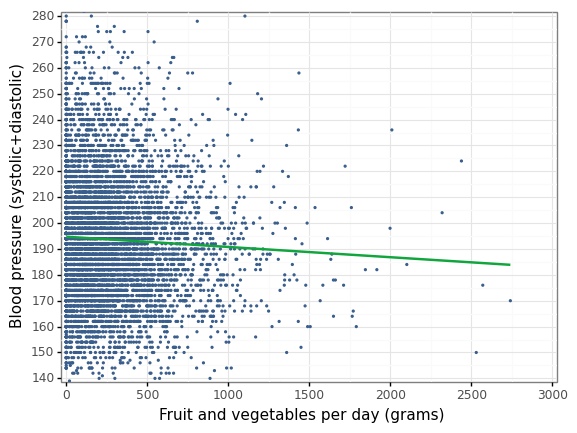

<ggplot: (8779485709949)>

In [179]:
# scatterplot and regression line
(
    ggplot(workfile, aes(x="fv", y="bp"))
    + geom_point(size=0.3, alpha=0.5, color=color[0])
    + geom_smooth(method="lm", color=color[1], se=False)
    + theme_bw()
    + labs(
        x="Fruit and vegetables per day (grams)",
        y="Blood pressure (systolic+diastolic)",
    )
    + scale_y_continuous(expand=(0.01, 0.01), breaks=seq(140, 280, 10))
    + scale_x_continuous(expand=(0.01, 0.01), breaks=seq(0, 3000, 500))
    + coord_cartesian(ylim=(140, 280), xlim=(0, 3000), expand=True)
)

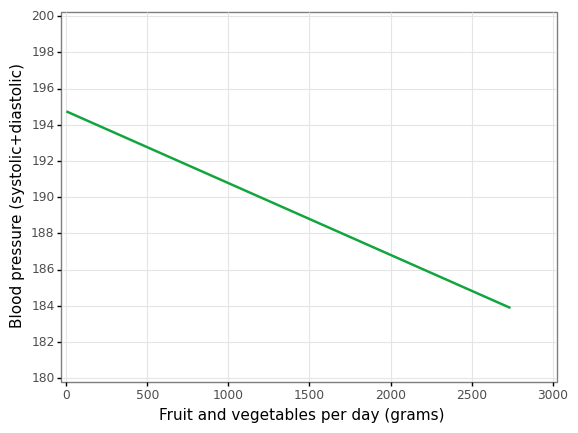

<ggplot: (8779489833009)>

In [180]:
# regression line only

(
    ggplot(workfile, aes(x="fv", y="bp"))
    + geom_smooth(method="lm", se=False, color=color[1])
    + theme_bw()
    + labs(
        x="Fruit and vegetables per day (grams)",
        y="Blood pressure (systolic+diastolic)",
    )
    + scale_y_continuous(
        expand=(0.01, 0.01), breaks=seq(180, 200, 2), minor_breaks=None
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), breaks=seq(0, 3000, 500), minor_breaks=None
    )
    + coord_cartesian(ylim=(180, 200), xlim=(0, 3000), expand=True)
)

#### Log household income per capita vs fruit and vegetables per day,grams

In [181]:
# gen Log household income per capita
workfile["lninc"] = np.log(workfile["hh_income_percap"])

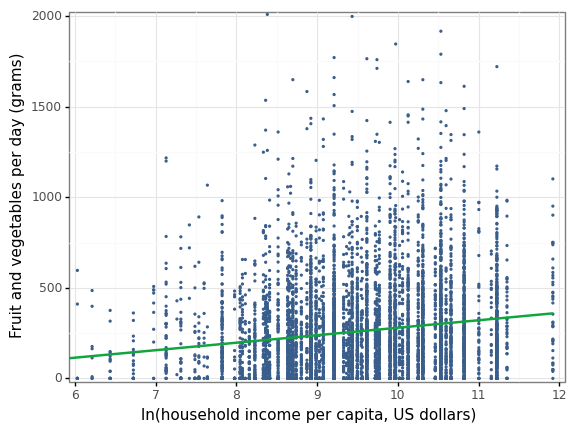

<ggplot: (8779484045849)>

In [182]:
# gen Log household income per capita
(
    ggplot(workfile, aes(x="lninc", y="fv"))
    + geom_point(size=0.3, alpha=0.5, color=color[0])
    + geom_smooth(method="lm", se=False, color=color[1])
    + theme_bw()
    + labs(
        x="ln(household income per capita, US dollars)",
        y="Fruit and vegetables per day (grams)",
    )
    + scale_y_continuous(expand=(0.01, 0.01), breaks=(0, 500, 1000, 1500, 2000))
    + scale_x_continuous(expand=(0.01, 0.01), breaks=(6, 7, 8, 9, 10, 11, 12))
    + coord_cartesian(xlim=(6, 12), ylim=(0, 2000), expand=True)
)

In [183]:
# Amount of fruit and vegetables per day, g (fv) vs Days per week vigorous recreational activities (exerc)
workfile.groupby("exerc").agg(tab_exerc=("year", "count"))

tab_exerc
exerc           
0.0         5665
1.0          248
2.0          354
3.0          474
4.0          258
5.0          213
6.0           77
7.0           68

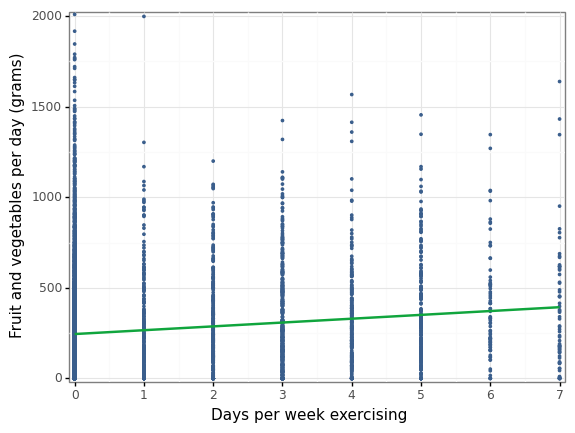

<ggplot: (8779434382169)>

In [184]:
(
    ggplot(workfile.dropna(subset=["exerc"]), aes(x="exerc", y="fv"))
    + geom_point(size=0.5, alpha=0.5, color=color[0])
    + geom_smooth(method="lm", se=False, color=color[1])
    + theme_bw()
    + labs(x="Days per week exercising", y="Fruit and vegetables per day (grams)")
    + scale_x_continuous(expand=(0.01, 0.01), breaks=seq(0, 7, 1))
    + scale_y_continuous(expand=(0.01, 0.01), breaks=seq(0, 2000, 500))
    + coord_cartesian(xlim=(0, 7), ylim=(0, 2000), expand=True)
)

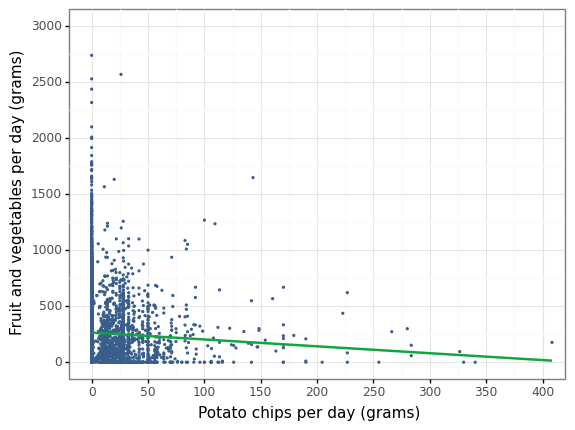

<ggplot: (8779485432725)>

In [185]:
# potato chips (potato_chips) and amount of fruit and vegetables per day (fv)
(
    ggplot(workfile, aes(x="pchips", y="fv"))
    + geom_point(size=0.3, alpha=0.5, color=color[0])
    + geom_smooth(method="lm", se=False, color=color[1])
    + theme_bw()
    + labs(x="Potato chips per day (grams)", y="Fruit and vegetables per day (grams)")
    + scale_x_continuous(breaks=seq(0, 400, 50))
    + scale_y_continuous(breaks=seq(0, 3000, 500))
    + coord_cartesian(xlim=(0, 400), ylim=(0, 3000), expand=True)
)

In [186]:
reg1 = smf.ols("bp ~ fv", data=workfile).fit(cov_type="HC1")
reg2 = smf.ols("fv ~ lninc", data=workfile).fit(cov_type="HC1")
reg3 = smf.ols("fv ~ exerc", data=workfile).fit(cov_type="HC1")
reg4 = smf.ols("fv ~ pchips", data=workfile).fit(cov_type="HC1")

In [187]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["Intercept", "fv", "lninc", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4"], [1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())

In [188]:
reg1 = smf.ols("bp ~ fv", data=workfile).fit(cov_type="HC1")
reg2 = smf.ols("bp ~ lninc", data=workfile).fit(cov_type="HC1")
reg3 = smf.ols("bp ~ exerc", data=workfile).fit(cov_type="HC1")
reg4 = smf.ols("bp ~ pchips", data=workfile).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["Intercept", "fv", "lninc", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 3"], [1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())

In [209]:
workfile.columns

Index(['seqn', 'food_code', 'days', 'grams', 'vitaminc', 'alcohol', 'caffeine',
       'cholesterol', 'year', 'gramsm',
       ...
       'hdl', 'weight', 'height', 'ldl', 'bmi', 'normal_weight', 'bp',
       'heart_risk', 'exerc', 'lninc'],
      dtype='object', length=663)

In [189]:
reg1 = smf.ols("bp ~ fv", data=workfile).fit(cov_type="HC1")
reg2 = smf.ols("bp ~ fv+lninc", data=workfile).fit(cov_type="HC1")
reg3 = smf.ols("bp ~ fv+lninc+exerc", data=workfile).fit(cov_type="HC1")
reg4 = smf.ols("bp ~ fv+lninc+exerc+pchips", data=workfile).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["Intercept", "fv", "lninc", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4"], [1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())

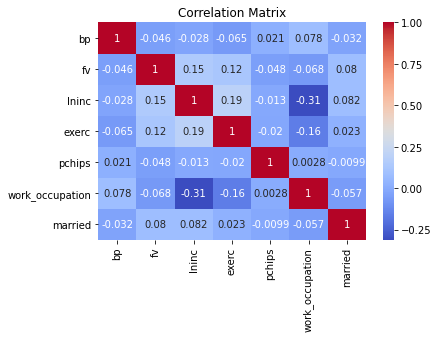

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = workfile[['bp', 'fv', 'lninc', 'exerc', 'pchips', 'work_occupation', 'married']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [191]:
print(data['work_occupation'].describe())

count    5839.000000
mean       13.027744
std         6.950635
min         1.000000
25%         8.000000
50%        14.000000
75%        17.000000
max        98.000000
Name: work_occupation, dtype: float64


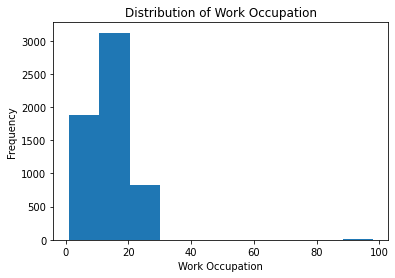

In [192]:
import matplotlib.pyplot as plt

plt.hist(data['work_occupation'], bins=10)
plt.xlabel('Work Occupation')
plt.ylabel('Frequency')
plt.title('Distribution of Work Occupation')
plt.show()

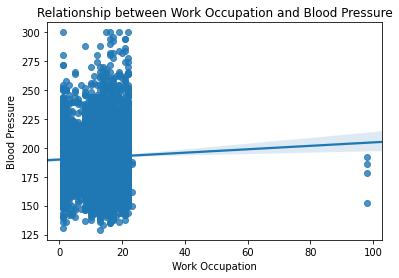

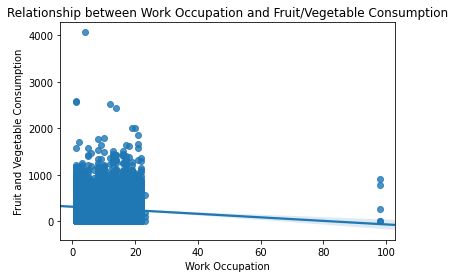

In [193]:
# Relationship with Outcome Variable (blood_pressure)
sns.regplot(x='work_occupation', y='blood_pressure', data=data)
plt.xlabel('Work Occupation')
plt.ylabel('Blood Pressure')
plt.title('Relationship between Work Occupation and Blood Pressure')
plt.show()

# Relationship with Causal Variable (veggies_n_fruits_gr)
sns.regplot(x='work_occupation', y='veggies_n_fruits_gr', data=data)
plt.xlabel('Work Occupation')
plt.ylabel('Fruit and Vegetable Consumption')
plt.title('Relationship between Work Occupation and Fruit/Vegetable Consumption')
plt.show()


In [194]:
final_df = workfile[['bp', 'fv', 'lninc', 'exerc', 'pchips', 'work_occupation']].copy()
final_df = final_df.rename(columns={'work_occupation': 'occupation'})
final_df

bp       fv      lninc  exerc  pchips  occupation
0     202.0   505.16   8.922658    0.0     0.0         NaN
1     200.0   553.50   9.498022    0.0     0.0         NaN
2     168.0  1100.20  10.657259    3.0    42.0        17.0
3     208.0    48.00  10.819778    0.0     0.0        17.0
4     220.0    59.00   8.922658    0.0     0.0         NaN
...     ...      ...        ...    ...     ...         ...
7353  186.0     0.00   8.650725    0.0     0.0         NaN
7354  184.0   708.10   8.922658    0.0     0.0         NaN
7355  192.0    42.00   9.433484    0.0     0.0         NaN
7356  178.0   649.00  11.225243    4.0     0.0         NaN
7357  218.0   362.89  10.596635    0.0     0.0         NaN

[7358 rows x 6 columns]

In [195]:
missing_values = final_df.isnull().sum()
percentage_missing = (missing_values / len(final_df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': percentage_missing})
missing_data = missing_data.sort_values(by='Missing Values', ascending=False)

print(missing_data)


            Missing Values  Percentage Missing
occupation            3988           54.199511
lninc                   64            0.869802
exerc                    1            0.013591
bp                       0            0.000000
fv                       0            0.000000
pchips                   0            0.000000


In [196]:
final_df_imputed = final_df.fillna(final_df.mean())
final_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7358 entries, 0 to 7357
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bp          7358 non-null   float64
 1   fv          7358 non-null   float64
 2   lninc       7358 non-null   float64
 3   exerc       7358 non-null   float64
 4   pchips      7358 non-null   float64
 5   occupation  7358 non-null   float64
dtypes: float64(6)
memory usage: 345.0 KB


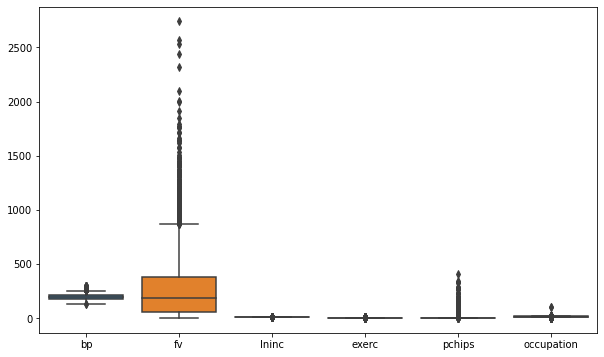

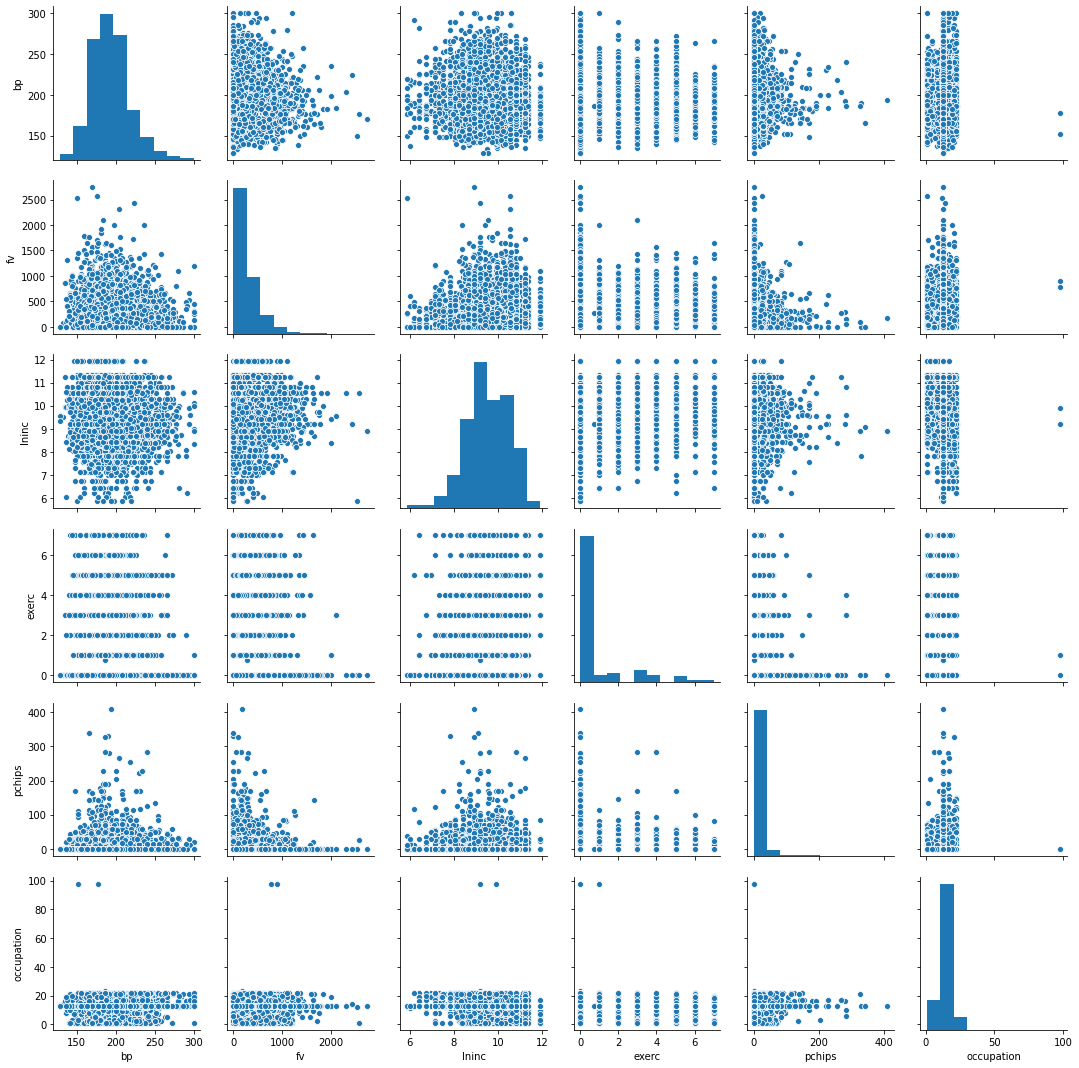

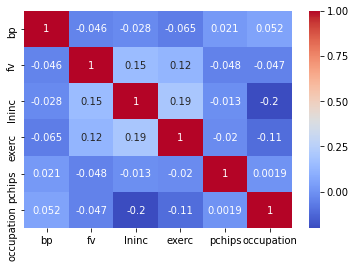

In [197]:
#Create visualizations to explore the distribution and relationships of the numerical variables. Some common plots include histograms, box plots, scatter plots, and correlation matrices.
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df_imputed)
plt.show()

# Scatter plot matrix
sns.pairplot(final_df_imputed)
plt.show()

# Correlation matrix
correlation_matrix = final_df_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [198]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the variables to be scaled
variables_to_scale = ['bp', 'fv', 'lninc', 'exerc', 'pchips', 'occupation']

# Perform the scaling
final_df_scaled = final_df_imputed.copy()
final_df_scaled[variables_to_scale] = scaler.fit_transform(final_df_imputed[variables_to_scale])

In [199]:
final_df_scaled['married'] = data['married'].astype(float)
final_df_scaled

bp        fv     lninc     exerc    pchips    occupation  married
0     0.349220  0.892395 -0.626174 -0.477029 -0.330228  3.722640e-16      1.0
1     0.264968  1.068591 -0.040299 -0.477029 -0.330228  3.722640e-16      0.0
2    -1.083065  3.061271  1.140114  1.468011  1.634523  8.754510e-01      1.0
3     0.601976 -0.773919  1.305602 -0.477029 -0.330228  8.754510e-01      1.0
4     1.107489 -0.733825 -0.626174 -0.477029 -0.330228  3.722640e-16      1.0
...        ...       ...       ...       ...       ...           ...      ...
7353 -0.324796 -0.948875 -0.903075 -0.477029 -0.330228  3.722640e-16      0.0
7354 -0.409049  1.632096 -0.626174 -0.477029 -0.330228  3.722640e-16      1.0
7355 -0.072040 -0.795788 -0.106017 -0.477029 -0.330228  3.722640e-16      0.0
7356 -0.661805  1.416681  1.718473  2.116358 -0.330228  3.722640e-16      1.0
7357  1.023237  0.373832  1.078382 -0.477029 -0.330228  3.722640e-16      1.0

[7358 rows x 7 columns]

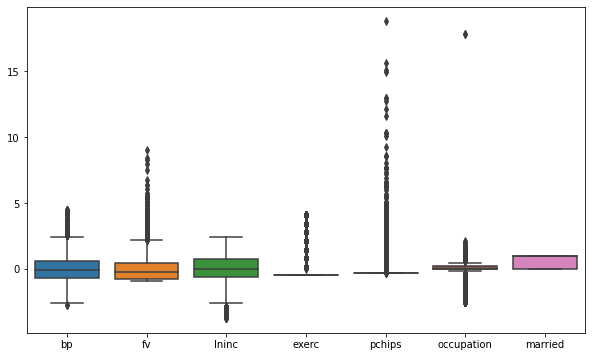

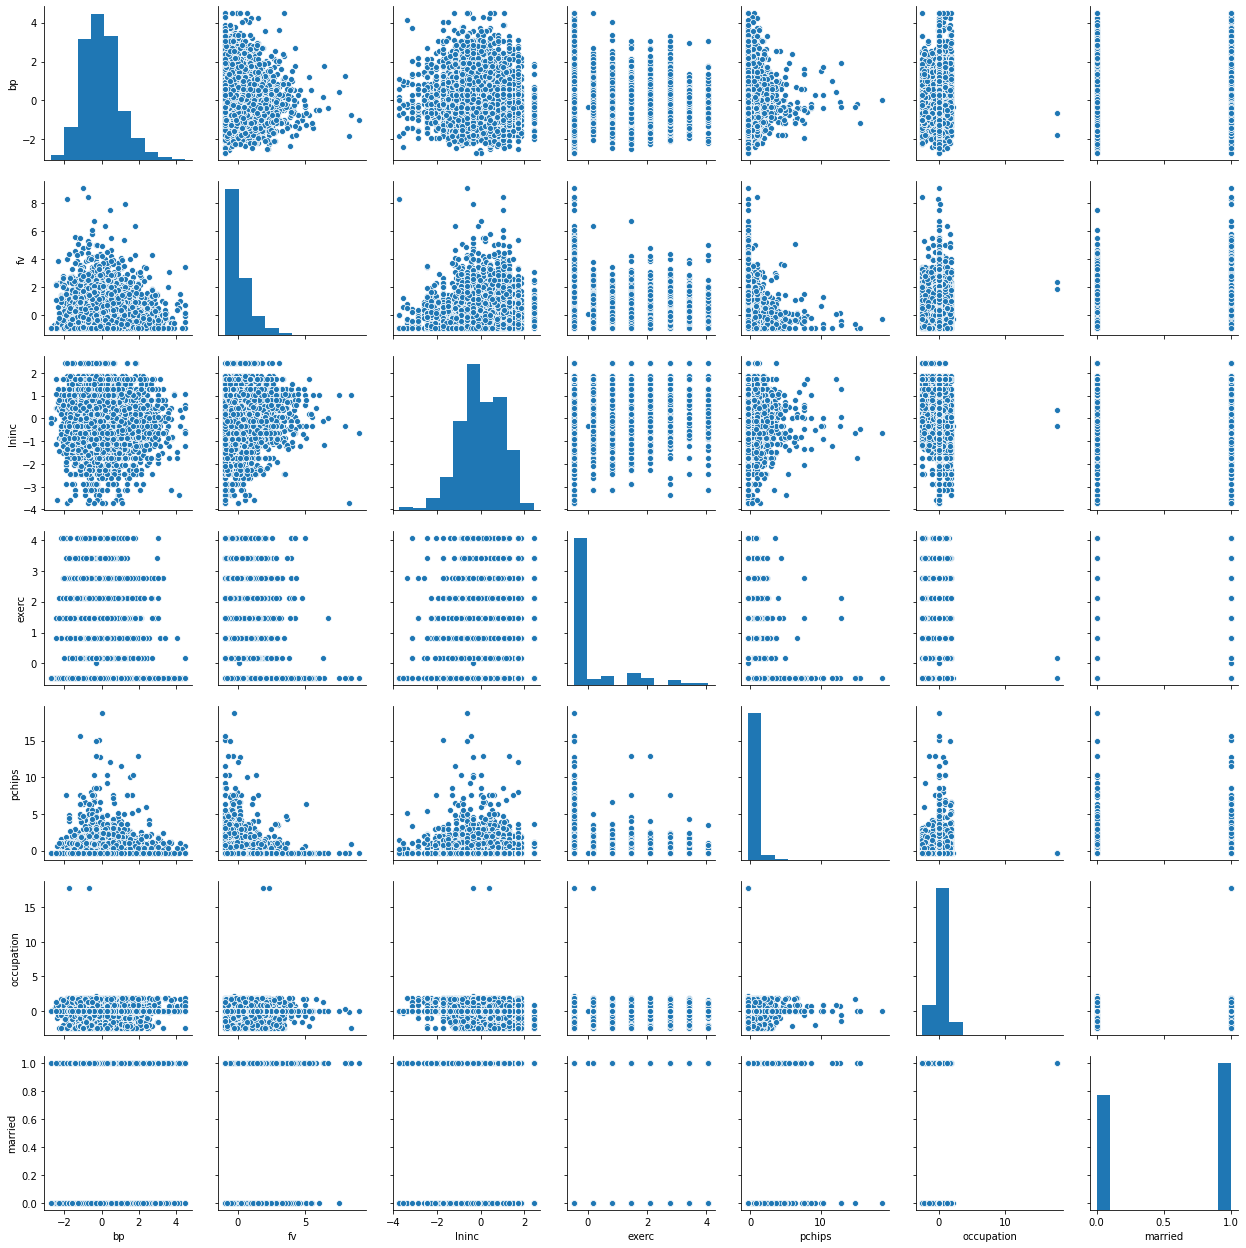

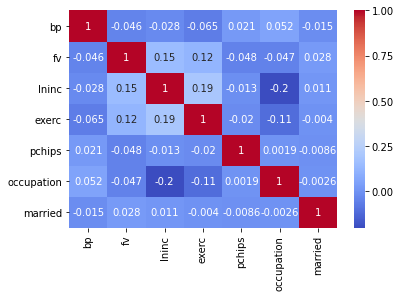

In [200]:
#Create visualizations to explore the distribution and relationships of the numerical variables. Some common plots include histograms, box plots, scatter plots, and correlation matrices.
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df_scaled)
plt.show()

# Scatter plot matrix
sns.pairplot(final_df_scaled)
plt.show()

# Correlation matrix
correlation_matrix = final_df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [201]:
final_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7358 entries, 0 to 7357
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bp          7358 non-null   float64
 1   fv          7358 non-null   float64
 2   lninc       7358 non-null   float64
 3   exerc       7358 non-null   float64
 4   pchips      7358 non-null   float64
 5   occupation  7358 non-null   float64
 6   married     7358 non-null   float64
dtypes: float64(7)
memory usage: 402.5 KB


In [202]:
final_df_scaled.describe()

bp            fv         lninc         exerc        pchips  \
count  7.358000e+03  7.358000e+03  7.358000e+03  7.358000e+03  7.358000e+03   
mean   4.584234e-16 -1.584384e-16 -2.674464e-15 -3.253091e-15 -1.207092e-18   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -2.725981e+00 -9.488751e-01 -3.726312e+00 -4.770287e-01 -3.302284e-01   
25%   -6.618048e-01 -7.537258e-01 -6.261737e-01 -4.770287e-01 -3.302284e-01   
50%   -7.204023e-02 -2.631737e-01 -8.501389e-14 -4.770287e-01 -3.302284e-01   
75%    6.019764e-01  4.325240e-01  7.854445e-01 -4.770287e-01 -3.302284e-01   
max    4.477572e+00  9.038218e+00  2.424283e+00  4.061398e+00  1.877230e+01   

         occupation      married  
count  7.358000e+03  7358.000000  
mean  -3.684518e-16     0.561566  
std    1.000068e+00     0.496229  
min   -2.477605e+00     0.000000  
25%    3.722640e-16     0.000000  
50%    3.722640e-16     1.000000  
75%    2.467531e-01     1.000000  
max    1.785030e+01     1.000000

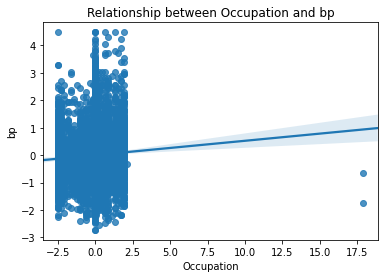

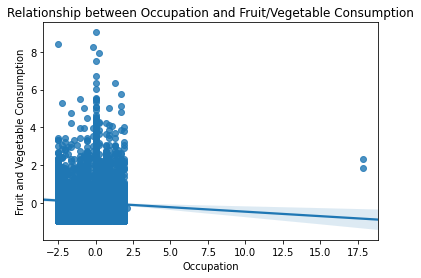

In [203]:
# Relationship with Outcome Variable (blood_pressure)
sns.regplot(x='occupation', y='bp', data=final_df_scaled)
plt.xlabel('Occupation')
plt.ylabel('bp')
plt.title('Relationship between Occupation and bp')
plt.show()

# Relationship with Causal Variable (veggies_n_fruits_gr)
sns.regplot(x='occupation', y='fv', data=final_df_scaled)
plt.xlabel('Occupation')
plt.ylabel('Fruit and Vegetable Consumption')
plt.title('Relationship between Occupation and Fruit/Vegetable Consumption')
plt.show()

In [210]:
reg1 = smf.ols("bp ~ fv", data=final_df_scaled).fit(cov_type="HC1")
reg2 = smf.ols("bp ~ fv+lninc", data=final_df_scaled).fit(cov_type="HC1")
reg3 = smf.ols("bp ~ fv+lninc+exerc", data=final_df_scaled).fit(cov_type="HC1")
reg4 = smf.ols("bp ~ fv+lninc+exerc+pchips", data=final_df_scaled).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["Intercept", "fv", "lninc", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 3"], [1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())

In [45]:
reg1 = smf.ols("bp ~ fv", data=final_df_scaled).fit(cov_type="HC1")
reg2 = smf.ols("bp ~ fv+lninc", data=final_df_scaled).fit(cov_type="HC1")
reg3 = smf.ols("bp ~ fv+lninc+exerc", data=final_df_scaled).fit(cov_type="HC1")
reg4 = smf.ols("bp ~ fv+lninc+exerc+pchips", data=final_df_scaled).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["Intercept", "fv", "lninc", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 3"], [1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())

In [211]:
# Remove outliers and run the same specifications
# Calculate the z-score for each variable
z_scores_occ = np.abs((final_df_scaled['occupation'] - final_df_scaled['occupation'].mean()) / final_df_scaled['occupation'].std())
z_scores_pchips = np.abs((final_df_scaled['pchips'] - final_df_scaled['pchips'].mean()) / final_df_scaled['pchips'].std())
z_scores_fv = np.abs((final_df_scaled['fv'] - final_df_scaled['fv'].mean()) / final_df_scaled['fv'].std())

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Remove outliers from the dataset
final_df_filtered = final_df_scaled[(z_scores_occ <= threshold) & (z_scores_pchips <= threshold) & (z_scores_fv <= threshold)]

# Check the updated statistics of the filtered dataset
final_df_filtered.describe()


bp           fv         lninc        exerc       pchips  \
count  7137.000000  7137.000000  7.137000e+03  7137.000000  7137.000000   
mean      0.001322    -0.063886 -3.939295e-04    -0.000218    -0.085959   
std       0.998762     0.847999  1.000370e+00     0.997886     0.586776   
min      -2.725981    -0.948875 -3.726312e+00    -0.477029    -0.330228   
25%      -0.661805    -0.763039 -6.261737e-01    -0.477029    -0.330228   
50%      -0.072040    -0.284806 -8.501389e-14    -0.477029    -0.330228   
75%       0.601976     0.389177  7.854445e-01    -0.477029    -0.330228   
max       4.477572     2.984472  2.424283e+00     4.061398     2.991137   

         occupation      married  
count  7.137000e+03  7137.000000  
mean  -7.478741e-03     0.562281  
std    9.561417e-01     0.496141  
min   -2.477605e+00     0.000000  
25%    3.722640e-16     0.000000  
50%    3.722640e-16     1.000000  
75%    2.467531e-01     1.000000  
max    2.132847e+00     1.000000

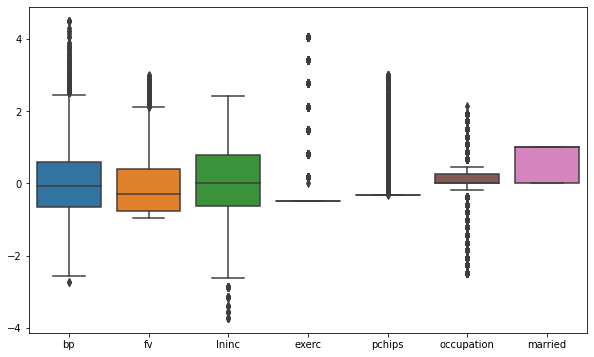

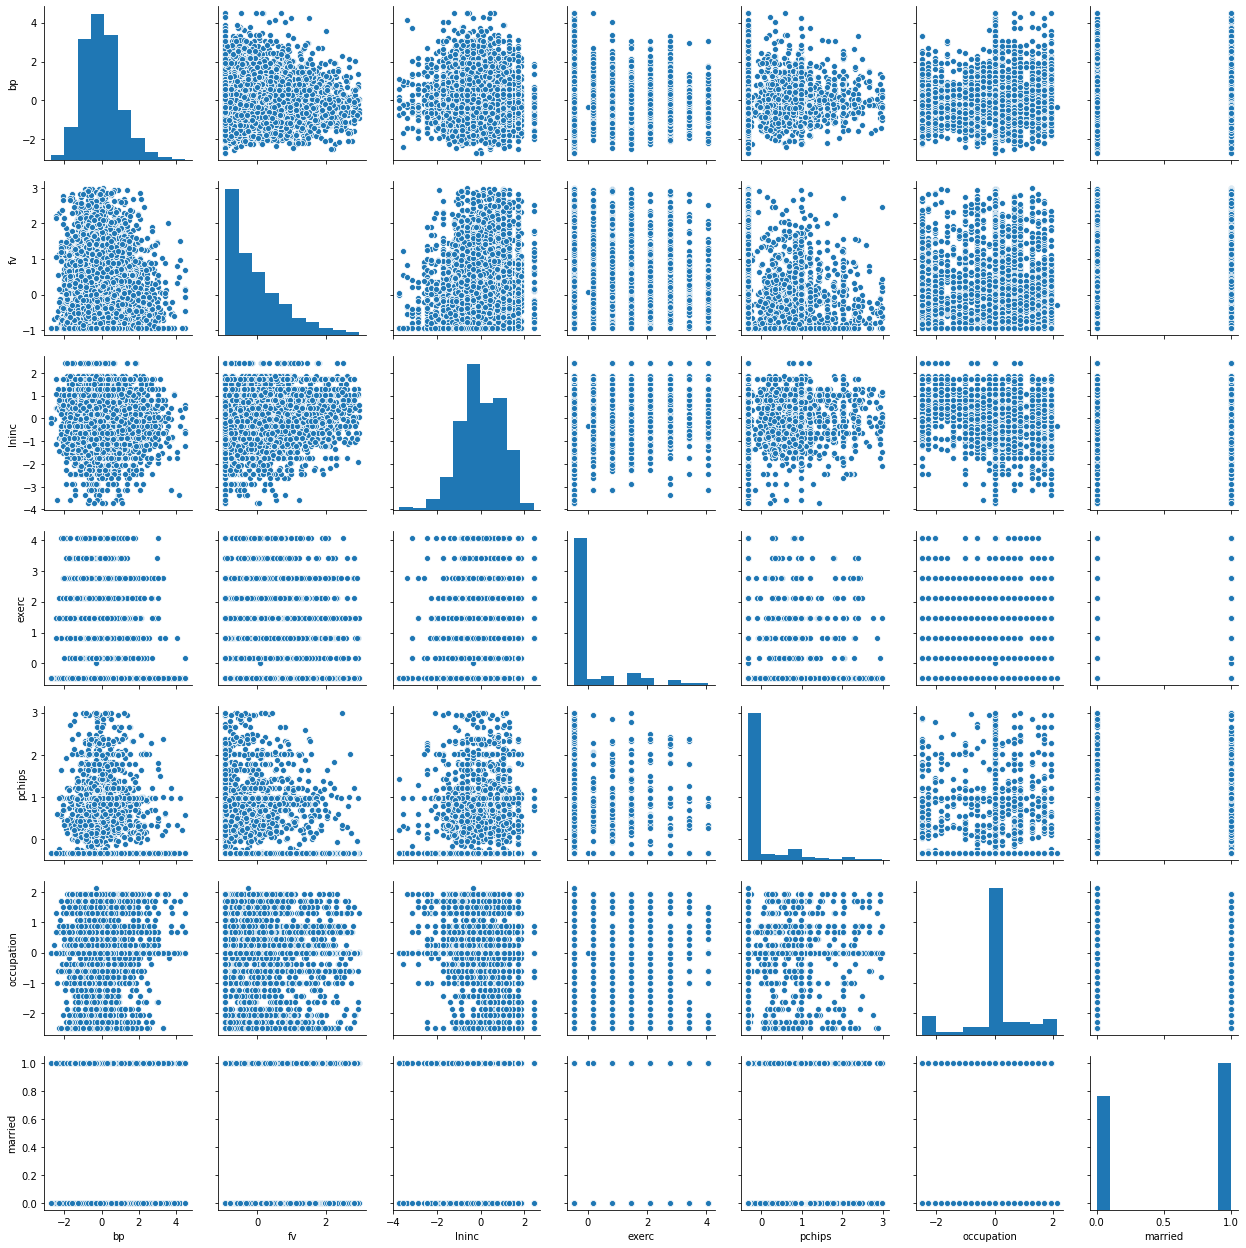

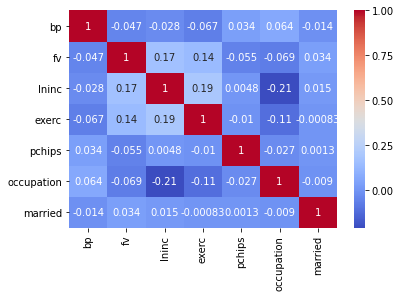

In [212]:
#Create visualizations to explore the distribution and relationships of the numerical variables. Some common plots include histograms, box plots, scatter plots, and correlation matrices.
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df_filtered)
plt.show()

# Scatter plot matrix
sns.pairplot(final_df_filtered)
plt.show()

# Correlation matrix
correlation_matrix = final_df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


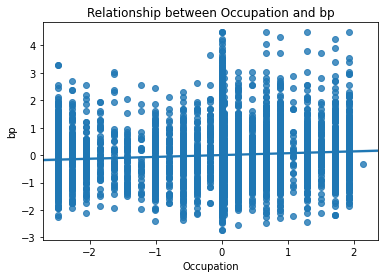

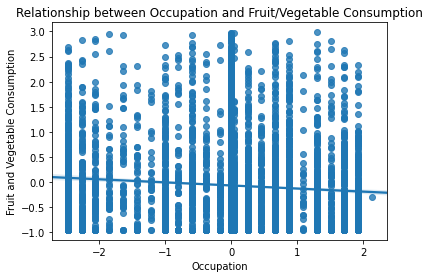

In [213]:
# Relationship with Outcome Variable (blood_pressure)
sns.regplot(x='occupation', y='bp', data=final_df_filtered)
plt.xlabel('Occupation')
plt.ylabel('bp')
plt.title('Relationship between Occupation and bp')
plt.show()

# Relationship with Causal Variable (veggies_n_fruits_gr)
sns.regplot(x='occupation', y='fv', data=final_df_filtered)
plt.xlabel('Occupation')
plt.ylabel('Fruit and Vegetable Consumption')
plt.title('Relationship between Occupation and Fruit/Vegetable Consumption')
plt.show()

In [214]:
final_df_filtered

bp        fv     lninc     exerc    pchips    occupation  married
0     0.349220  0.892395 -0.626174 -0.477029 -0.330228  3.722640e-16      1.0
1     0.264968  1.068591 -0.040299 -0.477029 -0.330228  3.722640e-16      0.0
3     0.601976 -0.773919  1.305602 -0.477029 -0.330228  8.754510e-01      1.0
4     1.107489 -0.733825 -0.626174 -0.477029 -0.330228  3.722640e-16      1.0
5    -0.409049  0.416359  1.305602  2.764704  1.204617 -2.477605e+00      0.0
...        ...       ...       ...       ...       ...           ...      ...
7353 -0.324796 -0.948875 -0.903075 -0.477029 -0.330228  3.722640e-16      0.0
7354 -0.409049  1.632096 -0.626174 -0.477029 -0.330228  3.722640e-16      1.0
7355 -0.072040 -0.795788 -0.106017 -0.477029 -0.330228  3.722640e-16      0.0
7356 -0.661805  1.416681  1.718473  2.116358 -0.330228  3.722640e-16      1.0
7357  1.023237  0.373832  1.078382 -0.477029 -0.330228  3.722640e-16      1.0

[7137 rows x 7 columns]

In [216]:
reg1 = smf.ols("bp ~ fv", data=final_df_filtered).fit(cov_type="HC1")
reg2 = smf.ols("bp ~ fv+lninc", data=final_df_filtered).fit(cov_type="HC1")
reg3 = smf.ols("bp ~ fv+lninc+exerc", data=final_df_filtered).fit(cov_type="HC1")
reg4 = smf.ols("bp ~ fv+lninc+exerc+pchips", data=final_df_filtered).fit(cov_type="HC1")
reg5 = smf.ols("bp ~ fv+lninc+exerc+pchips+married", data=final_df_filtered).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5])
stargazer.covariate_order(["Intercept", "fv", "lninc", "exerc", "pchips", "married"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"], [1, 1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())

In [51]:
# IVs Regression

In [217]:
numeric_variables = final_df_filtered.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_variables

['bp', 'fv', 'lninc', 'exerc', 'pchips', 'occupation', 'married']

In [218]:
reg1 = smf.ols("bp ~ fv", data=final_df_filtered).fit(cov_type="HC1")
reg2 = smf.ols("fv ~ lninc", data=final_df_filtered).fit(cov_type="HC1")
reg3 = smf.ols("fv ~ exerc", data=final_df_filtered).fit(cov_type="HC1")
reg4 = smf.ols("fv ~ pchips", data=final_df_filtered).fit(cov_type="HC1")
reg5 = smf.ols("fv ~ married", data=final_df_filtered).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5])
stargazer.covariate_order(["Intercept", "fv", "lninc", "exerc", "pchips", "married"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"], [1, 1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())

In [219]:
# Step 1: Estimate the first-stage regressions to obtain predicted values for lninc:
# Model 1 - First stage for lninc using occupation as an instrument
first_stage_lninc = sm.OLS(final_df_filtered['lninc'], final_df_filtered[['occupation']]).fit()
lninc_hat = first_stage_lninc.predict()

In [220]:
# Step 2: Use the predicted values of lninc in the second-stage regressions:
# Model 1 - Second stage regression using fv and lninc_hat
second_stage_reg1 = smf.ols("bp ~ fv + lninc_hat", data=final_df_filtered).fit(cov_type="HC1")

# Model 2 - Second stage regression using fv, lninc_hat, and exerc
second_stage_reg2 = smf.ols("bp ~ fv + lninc_hat + exerc", data=final_df_filtered).fit(cov_type="HC1")

# Model 3 - Second stage regression using fv, lninc_hat, exerc, and pchips
second_stage_reg3 = smf.ols("bp ~ fv + lninc_hat + exerc + pchips", data=final_df_filtered).fit(cov_type="HC1")


In [222]:
#Step 3: Report the results using Stargazer:
stargazer = Stargazer([second_stage_reg1, second_stage_reg2, second_stage_reg3])
stargazer.covariate_order(["Intercept", "fv", "lninc_hat", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3"], [1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())


In [57]:
# Step 1: Estimate the first-stage regressions to obtain predicted values for lninc:
# Model 1 - First stage for lninc using occupation as an instrument
first_stage_lninc = sm.OLS(final_df_filtered['lninc'], final_df_filtered[['occupation', 'married']]).fit()
lninc_hat = first_stage_lninc.predict()

In [58]:
# Step 2: Use the predicted values of lninc in the second-stage regressions:
# Model 1 - Second stage regression using fv and lninc_hat
second_stage_reg1 = smf.ols("bp ~ fv + lninc_hat", data=final_df_filtered).fit(cov_type="HC1")

# Model 2 - Second stage regression using fv, lninc_hat, and exerc
second_stage_reg2 = smf.ols("bp ~ fv + lninc_hat + exerc", data=final_df_filtered).fit(cov_type="HC1")

# Model 3 - Second stage regression using fv, lninc_hat, exerc, and pchips
second_stage_reg3 = smf.ols("bp ~ fv + lninc_hat + exerc + pchips", data=final_df_filtered).fit(cov_type="HC1")


In [223]:
#Step 3: Report the results using Stargazer:
stargazer = Stargazer([second_stage_reg1, second_stage_reg2, second_stage_reg3])
stargazer.covariate_order(["Intercept", "fv", "lninc_hat", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3"], [1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())


Based on the results from the models above, it seems that the addition of the instrumental variable 'married' for the confounder 'lninc' did lead to insignificant improvements in the estimated effects of 'fv' on the outcome variable 'bp' in the models with one instrumental variable. The coefficient estimates for 'fv' and 'lninc_hat' are similar between the two sets of results, indicating that the inclusion of 'married' did not significantly change the estimated causal relationship between 'fv' and 'bp'.

Here are some key observations based on the provided results:

Coefficient estimates: The coefficient estimates for 'fv' remain consistently negative and statistically significant across all models. This suggests that there is a negative relationship between 'fv' and 'bp', indicating that an increase in 'fv' is associated with a decrease in 'bp'.

Instrumental variable 'lninc_hat': The instrumental variable 'lninc_hat' (predicted values of 'lninc') remains statistically significant in all models. This suggests that the instrumental variable is effectively capturing the exogenous variation in 'lninc' and helps address the endogeneity issue.

Control variables: The inclusion of 'exerc' and 'pchips' as control variables also shows consistent patterns in the coefficient estimates across models. 'exerc' has a negative coefficient, indicating that increased exercise is associated with lower 'bp'. 'pchips' has a positive coefficient, suggesting that higher consumption of potato chips is associated with higher 'bp'.

Overall, the addition of the instrumental variable 'married' for the confounder 'lninc' does not seem to have substantially influenced the estimated causal effect of 'fv' on 'bp'. The coefficient estimates for 'fv' and the control variables remain constant, indicating that the relationship between these variables and 'bp' is relatively stable.

# Using ML models to improve estimation results in IV specifications
The results from IV models suggest that out model is stable. In order to be able to improve the results from econometric models, we will use ML models to improve prediction results in the first stage of 2SLS and pick the best prediction model. Then, we will use this ML algorithm for the whole data set to get the predicted values for lninc_hat and use them in the second stage to see if there will be improvement in IV models.   

In [224]:
# Define a new df for prediction

selected_columns = ['bp', 'fv', 'exerc', 'pchips', 'lninc', 'work_type', 'work_occupation', 'age', 'edu', 'hh_size', 'sport_days', 'walk_cycle_days', 'smoker', 'weight', 'race', 'married']

df_pred = workfile[selected_columns].copy()

# Convert categorical variables to numerical variables
categorical_columns = ['work_type', 'work_occupation', 'edu', 'race', 'married']
for col in categorical_columns:
    df_pred[col] = df_pred[col].astype('category').cat.codes

# Convert the remaining columns to float
df_pred = df_pred.astype(float)


In [225]:
# EDA and Feature Engineering for numerical variables
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7358 entries, 0 to 7357
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bp               7358 non-null   float64
 1   fv               7358 non-null   float64
 2   exerc            7357 non-null   float64
 3   pchips           7358 non-null   float64
 4   lninc            7294 non-null   float64
 5   work_type        7358 non-null   float64
 6   work_occupation  7358 non-null   float64
 7   age              7358 non-null   float64
 8   edu              7358 non-null   float64
 9   hh_size          7358 non-null   float64
 10  sport_days       7358 non-null   float64
 11  walk_cycle_days  7358 non-null   float64
 12  smoker           7358 non-null   float64
 13  weight           7322 non-null   float64
 14  race             7358 non-null   float64
 15  married          7358 non-null   float64
dtypes: float64(16)
memory usage: 919.9 KB


In [226]:
df_pred = df_pred.dropna(subset=['lninc','exerc', 'weight'])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7258 entries, 0 to 7357
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bp               7258 non-null   float64
 1   fv               7258 non-null   float64
 2   exerc            7258 non-null   float64
 3   pchips           7258 non-null   float64
 4   lninc            7258 non-null   float64
 5   work_type        7258 non-null   float64
 6   work_occupation  7258 non-null   float64
 7   age              7258 non-null   float64
 8   edu              7258 non-null   float64
 9   hh_size          7258 non-null   float64
 10  sport_days       7258 non-null   float64
 11  walk_cycle_days  7258 non-null   float64
 12  smoker           7258 non-null   float64
 13  weight           7258 non-null   float64
 14  race             7258 non-null   float64
 15  married          7258 non-null   float64
dtypes: float64(16)
memory usage: 964.0 KB


In [227]:
# Check if there is missing values in df_num
missing_values = df_pred.isnull().sum()
print(missing_values)

bp                 0
fv                 0
exerc              0
pchips             0
lninc              0
work_type          0
work_occupation    0
age                0
edu                0
hh_size            0
sport_days         0
walk_cycle_days    0
smoker             0
weight             0
race               0
married            0
dtype: int64


In [228]:
df_pred1 = df_pred.drop(['bp', 'fv', 'exerc', 'pchips'], axis=1)
df_pred1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7258 entries, 0 to 7357
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lninc            7258 non-null   float64
 1   work_type        7258 non-null   float64
 2   work_occupation  7258 non-null   float64
 3   age              7258 non-null   float64
 4   edu              7258 non-null   float64
 5   hh_size          7258 non-null   float64
 6   sport_days       7258 non-null   float64
 7   walk_cycle_days  7258 non-null   float64
 8   smoker           7258 non-null   float64
 9   weight           7258 non-null   float64
 10  race             7258 non-null   float64
 11  married          7258 non-null   float64
dtypes: float64(12)
memory usage: 737.1 KB


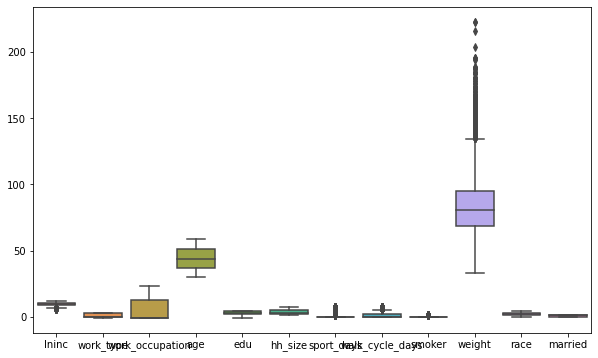

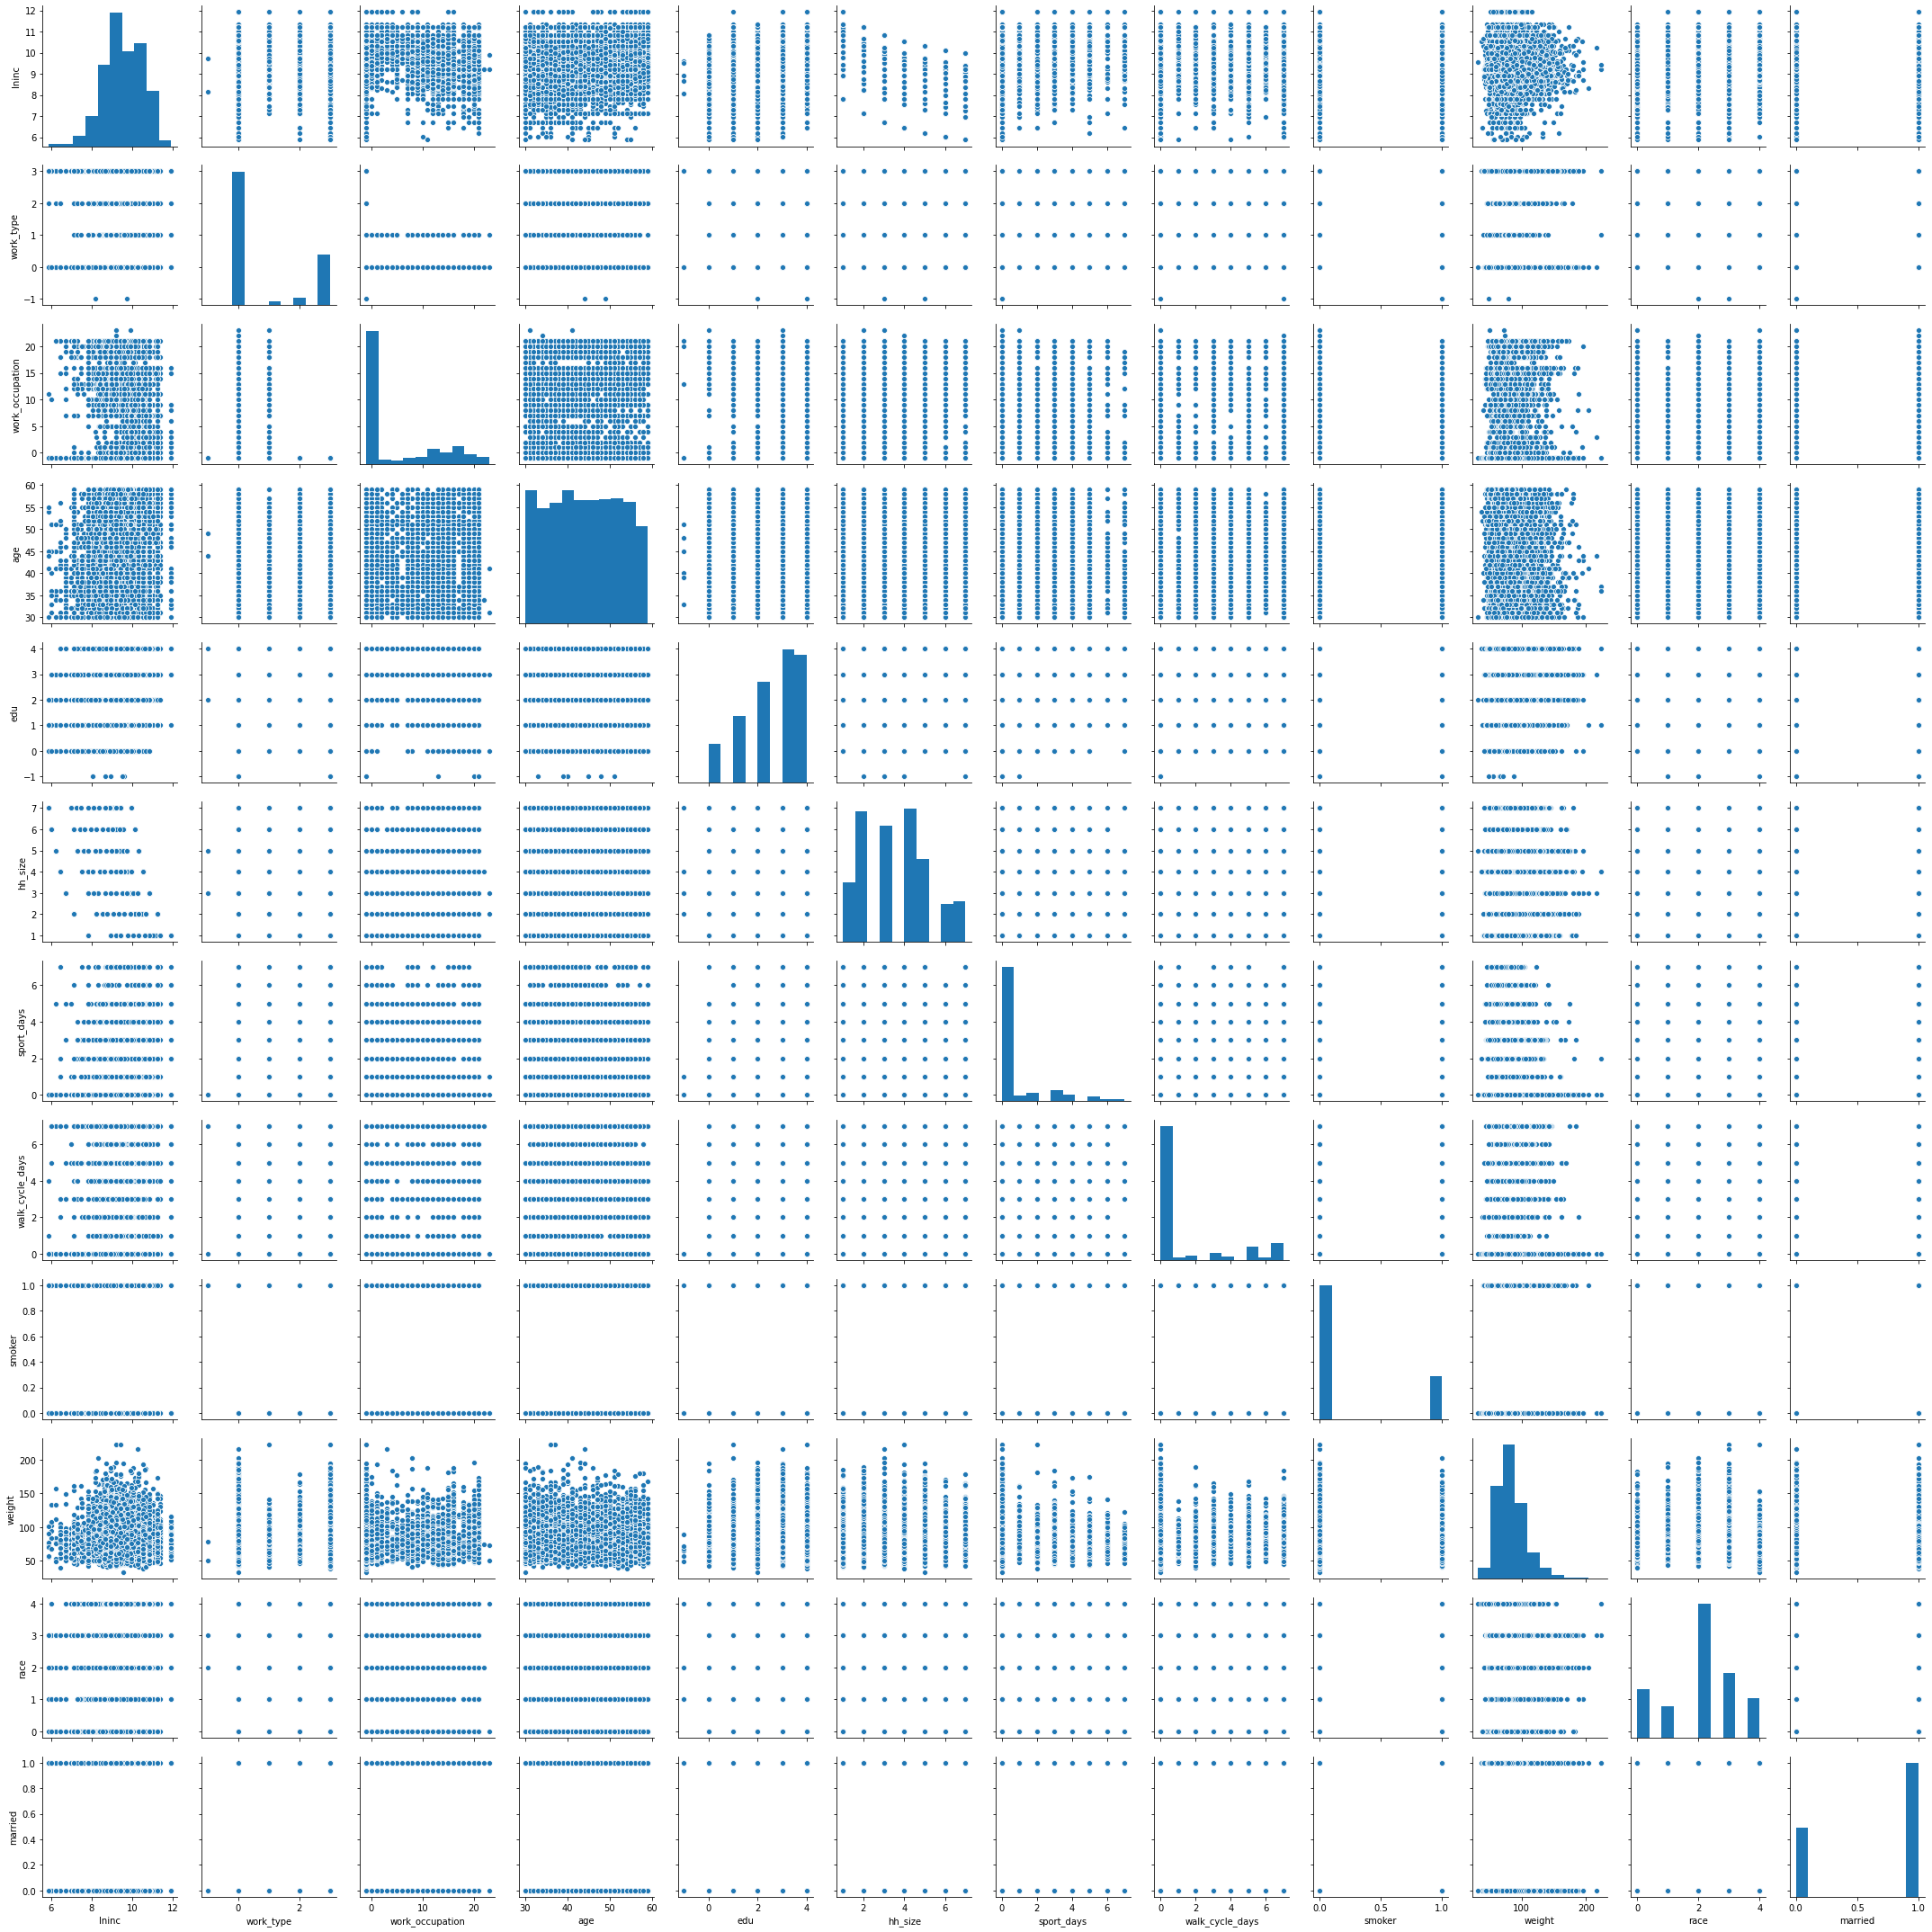

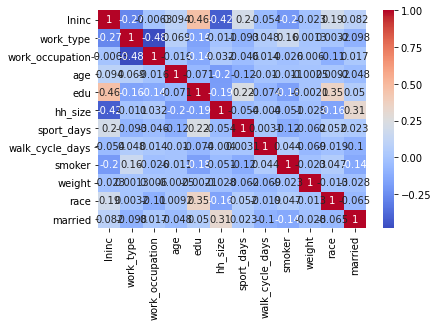

In [229]:
#Create visualizations to explore the distribution and relationships of the numerical variables. Some common plots include histograms, box plots, scatter plots, and correlation matrices.
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pred1)
plt.show()

# Scatter plot matrix
sns.pairplot(df_pred1)
plt.show()

# Correlation matrix
correlation_matrix = df_pred1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [230]:
#Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_pred_scaled0 = pd.DataFrame(scaler.fit_transform(df_pred1), columns=df_pred1.columns)
df_pred_scaled0

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7253 -0.899821   1.608127        -0.751150 -0.720643 -0.413547  2.086876   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582  
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582  
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582  
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569  
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582  
...          ...              ...       ...       ...       ...       ...  
7253   -0.477040        -0.559326 -0.569607 -0.090802 -0.039867  0.717582  
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582  
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569  
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582  
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569  

[7258 rows x 12 columns]

In [231]:
# EDA and Feature Engineering for numerical variables
df_pred_scaled0.describe()

lninc     work_type  work_occupation           age  \
count  7.258000e+03  7.258000e+03     7.258000e+03  7.258000e+03   
mean   1.599865e-15 -2.666493e-16    -2.763482e-14 -1.366134e-16   
std    1.000069e+00  1.000069e+00     1.000069e+00  1.000069e+00   
min   -3.708735e+00 -1.421932e+00    -7.511504e-01 -1.658731e+00   
25%   -6.243240e-01 -6.644171e-01    -7.511504e-01 -8.379040e-01   
50%   -4.142160e-02 -6.644171e-01    -7.511504e-01 -1.707700e-02   
75%    7.801332e-01  1.608127e+00     1.033040e+00  8.037500e-01   
max    2.410658e+00  1.608127e+00     2.307462e+00  1.741838e+00   

                edu       hh_size    sport_days  walk_cycle_days  \
count  7.258000e+03  7.258000e+03  7.258000e+03     7.258000e+03   
mean  -2.943728e-15 -7.224251e-16  3.686872e-15     1.073297e-15   
std    1.000069e+00  1.000069e+00  1.000069e+00     1.000069e+00   
min   -2.794451e+00 -1.535111e+00 -4.770397e-01    -5.593257e-01   
25%   -4.135472e-01 -9.314463e-01 -4.770397e-01    -5.593257e-01   
50%    3.800873e-01 -3.277819e-01 -4.770397e-01    -5.593257e-01   
75%    1.173722e+00  8.795468e-01 -4.770397e-01     2.746073e-01   
max    1.173722e+00  2.086876e+00  4.068436e+00     2.359440e+00   

             smoker        weight          race       married  
count  7.258000e+03  7.258000e+03  7.258000e+03  7.258000e+03  
mean   6.089553e-16  1.455848e-16 -6.185769e-16  2.973342e-16  
std    1.000069e+00  1.000069e+00  1.000069e+00  1.000069e+00  
min   -5.696074e-01 -2.306702e+00 -1.727057e+00 -1.393569e+00  
25%   -5.696074e-01 -7.000613e-01 -8.834621e-01 -1.393569e+00  
50%   -5.696074e-01 -1.449581e-01 -3.986679e-02  7.175819e-01  
75%   -5.696074e-01  4.958928e-01  8.037285e-01  7.175819e-01  
max    1.755595e+00  6.277090e+00  1.647324e+00  7.175819e-01

Explained Variance Ratio for PC1: 0.17661341763387356
Explained Variance Ratio for PC2: 0.13740539950614739
Explained Variance Ratio for PC3: 0.11274628971472586
Explained Variance Ratio for PC4: 0.09423691919055038
Explained Variance Ratio for PC5: 0.08686445095858072
Explained Variance Ratio for PC6: 0.08107527123632415
Explained Variance Ratio for PC7: 0.07439552442355855
Explained Variance Ratio for PC8: 0.06412778849911821
Explained Variance Ratio for PC9: 0.06109226663650882
Explained Variance Ratio for PC10: 0.045434674187712486
Explained Variance Ratio for PC11: 0.036180089688709206
Explained Variance Ratio for PC12: 0.029827908324190782


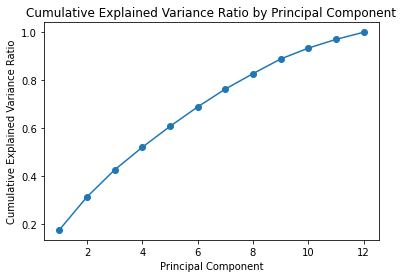

In [232]:
from sklearn.decomposition import PCA

# Instantiate PCA with the number of components equal to the number of columns in the scaled numerical data
pca = PCA(n_components=12)

# Apply PCA to the scaled numerical data
pca.fit(df_pred_scaled0)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for PC{i+1}: {ratio}")

# Plot the cumulative explained variance ratio
plt.plot(range(1, 13), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Component')
plt.show()

Variable Contributions for PCs:
         lninc  work_type  work_occupation       age       edu   hh_size  \
PC0  -0.556965   0.266311        -0.000512 -0.034251 -0.519258  0.343271   
PC1  -0.000611   0.518699        -0.474611  0.216918  0.046082 -0.379511   
PC2   0.083416  -0.329647         0.528952  0.325598 -0.235069 -0.394963   
PC3  -0.097254  -0.096182         0.117040 -0.471621  0.041918  0.037881   
PC4  -0.151560  -0.117559         0.118228 -0.493640  0.131796  0.044433   
PC5  -0.000350   0.098393        -0.111966 -0.133834 -0.071343 -0.115817   
PC6   0.010104  -0.028076        -0.003585  0.095095  0.147525  0.180982   
PC7   0.204522  -0.002714        -0.010860  0.162997 -0.062706 -0.074597   
PC8  -0.339638  -0.024750         0.166650  0.502050 -0.088209  0.277797   
PC9  -0.051929  -0.307753        -0.248999  0.269839  0.534448  0.418593   
PC10  0.246793  -0.521601        -0.548454 -0.033133 -0.553603  0.118649   
PC11 -0.655373  -0.387845        -0.253055  0.012857  0.

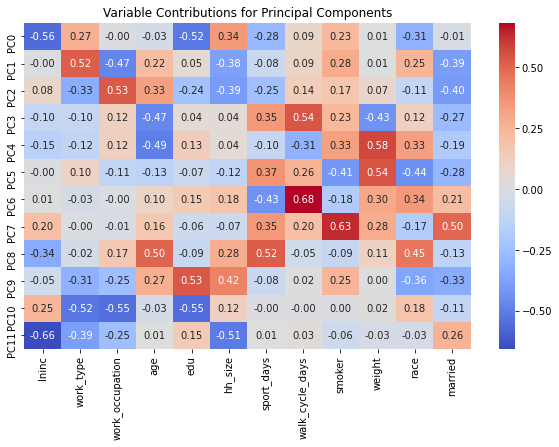

In [233]:
# Instantiate PCA with the number of components equal to the number of columns in the scaled numerical data
pca = PCA(n_components=12)

# Apply PCA to the scaled numerical data
pca.fit(df_pred_scaled0)

# Get the contribution of each original variable to the principal components
variable_contributions = pca.components_

# Create a DataFrame to hold the variable contributions
contributions_df = pd.DataFrame(variable_contributions, columns=df_pred_scaled0.columns, index=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])

# Print the variable contributions for PCs
print("Variable Contributions for PCs:")
print(contributions_df)

# Create a heatmap to visualize the variable contributions
plt.figure(figsize=(10, 6))
sns.heatmap(contributions_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Variable Contributions for Principal Components")
plt.show()


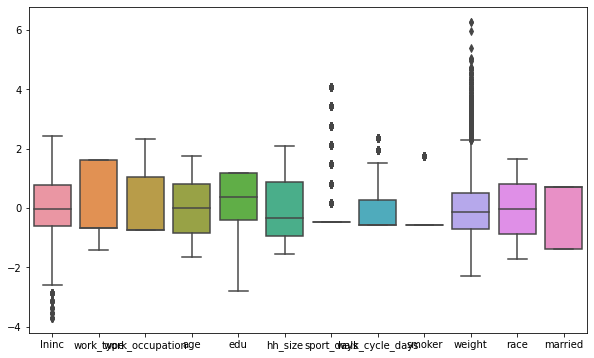

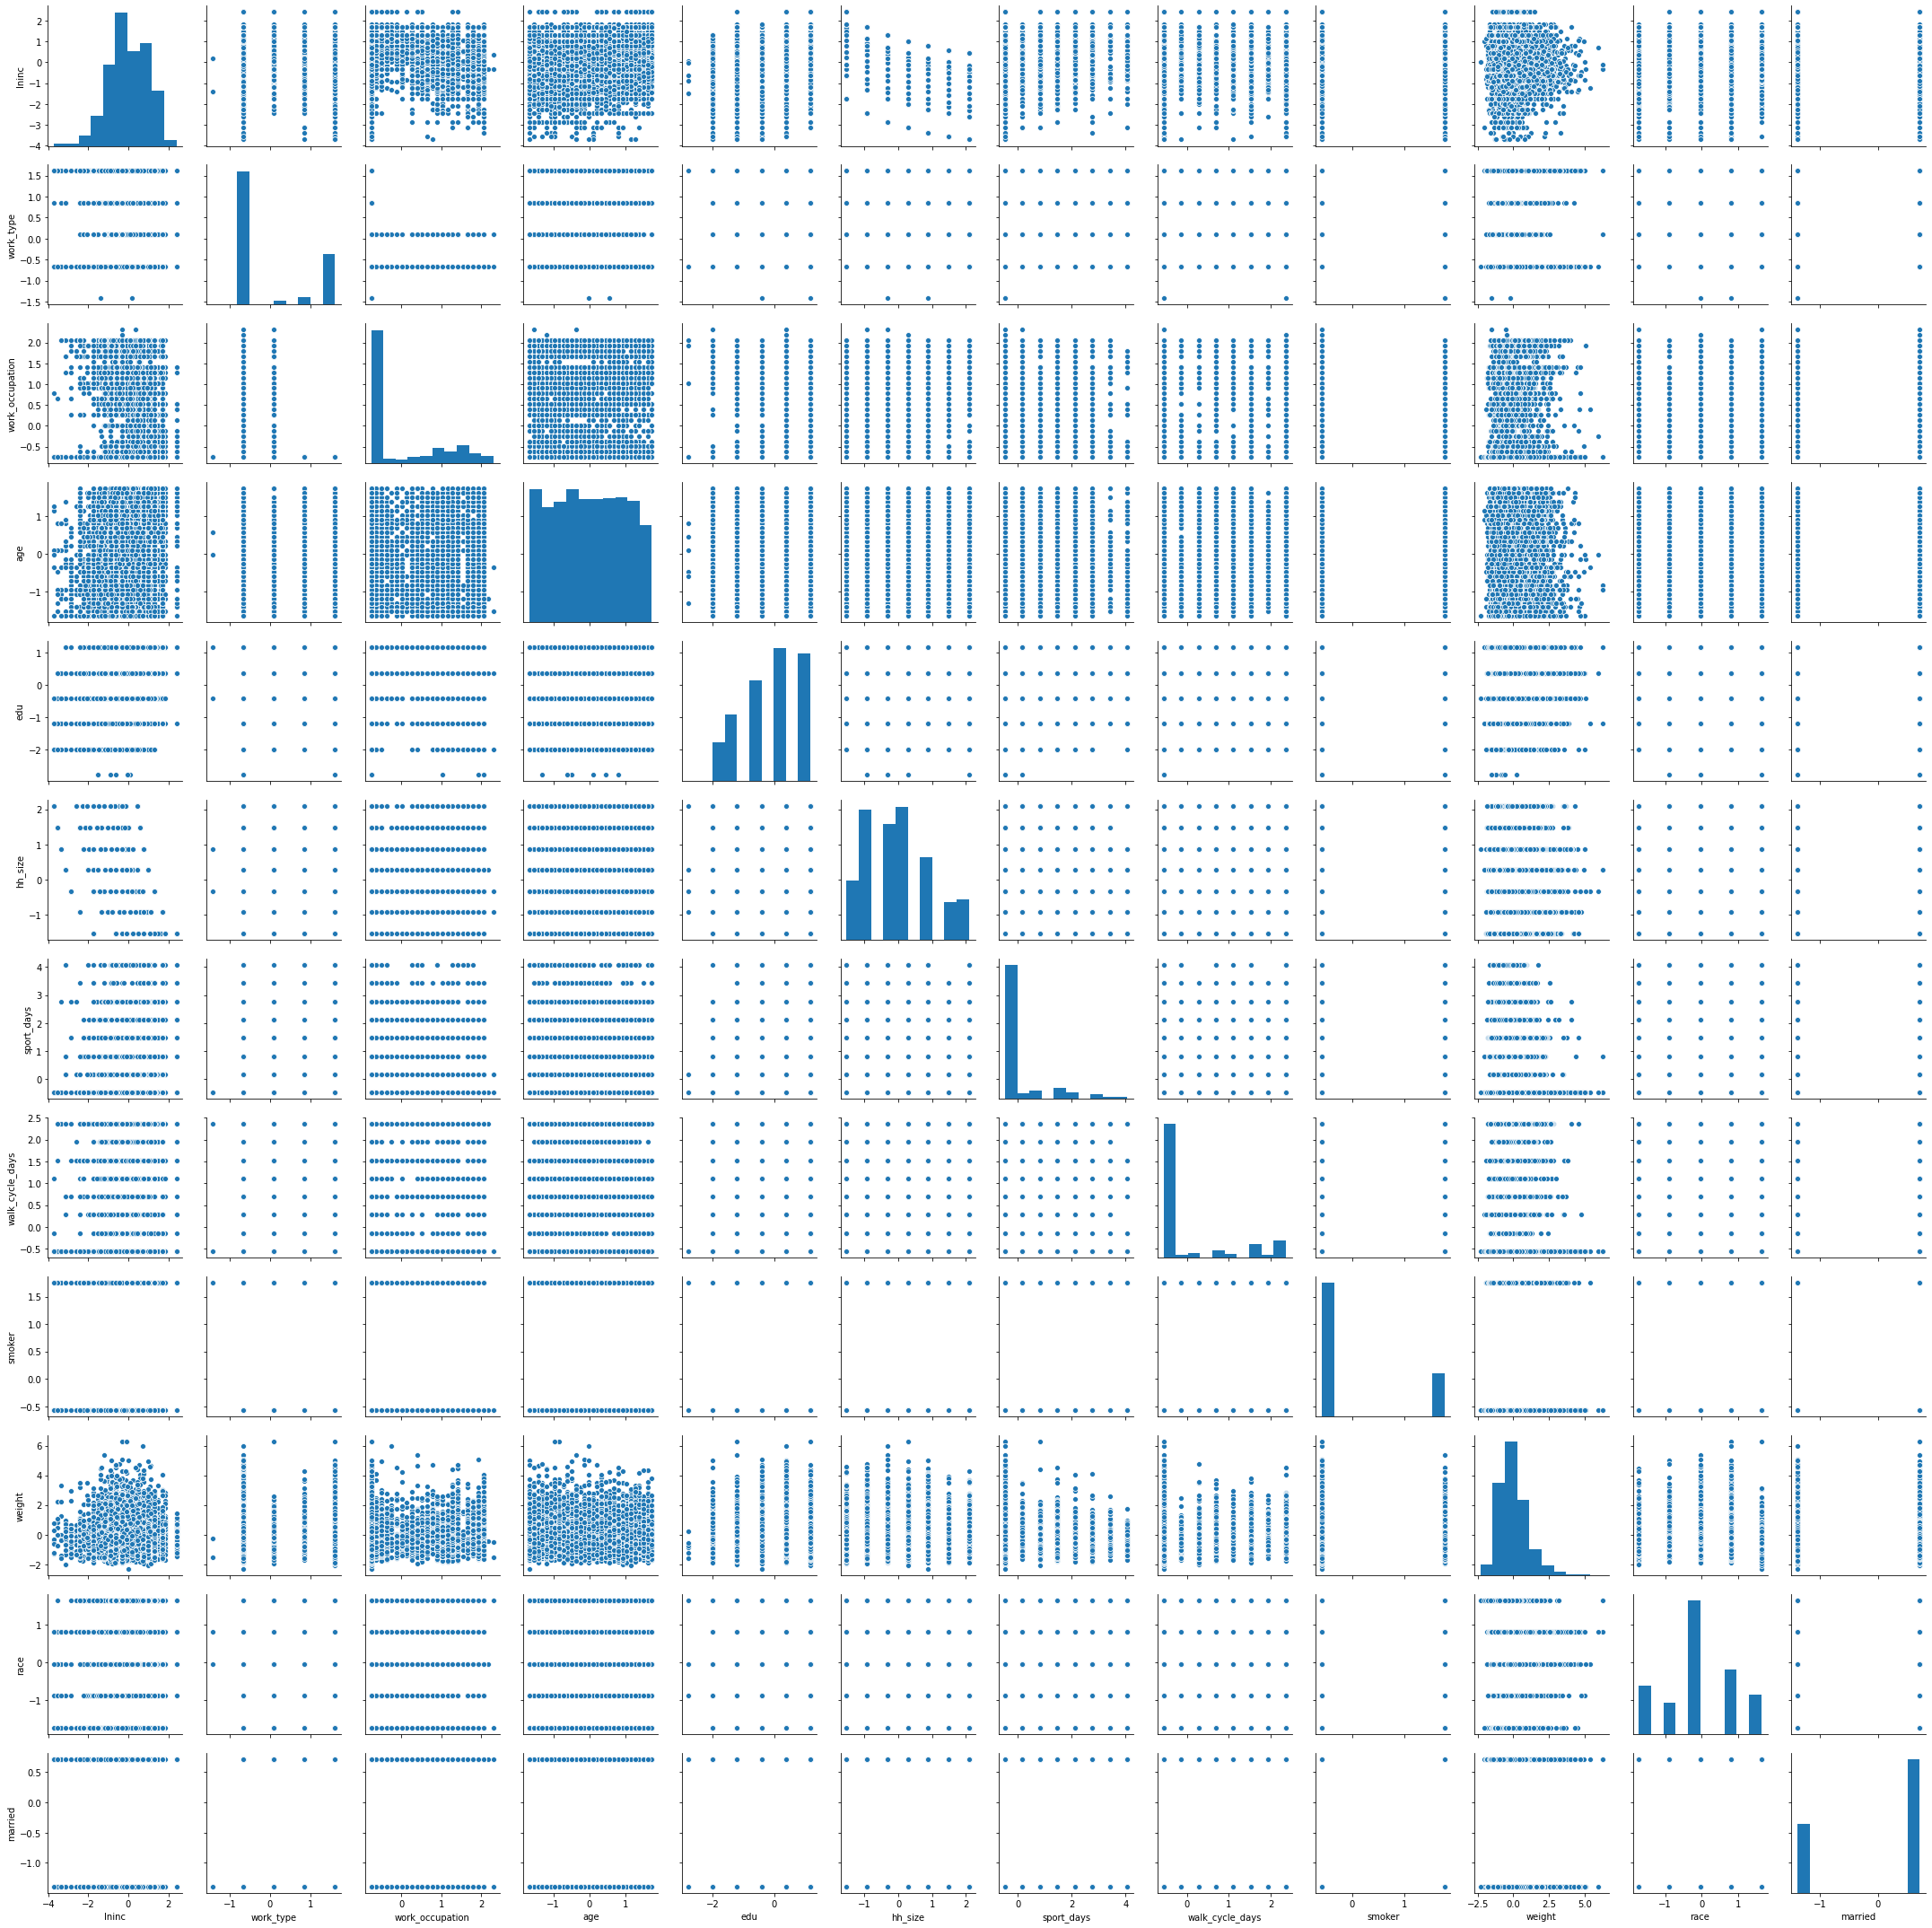

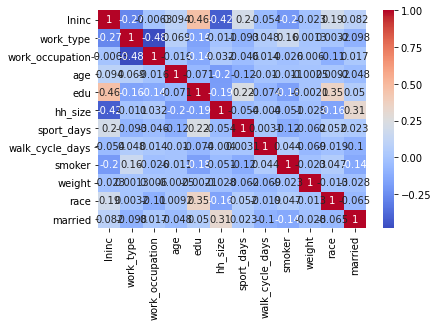

In [234]:
#Create visualizations to explore the distribution and relationships of the numerical variables. Some common plots include histograms, box plots, scatter plots, and correlation matrices.
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pred_scaled0)
plt.show()

# Scatter plot matrix
sns.pairplot(df_pred_scaled0)
plt.show()

# Correlation matrix
correlation_matrix = df_pred_scaled0.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [235]:
#Check skewness in numerical variables 
skewness = df_pred_scaled0.skew()
print(skewness)

lninc             -0.264353
work_type          0.902786
work_occupation    0.848538
age                0.012128
edu               -0.489822
hh_size            0.376480
sport_days         2.126632
walk_cycle_days    1.471113
smoker             1.186233
weight             1.150449
race              -0.196547
married           -0.676127
dtype: float64


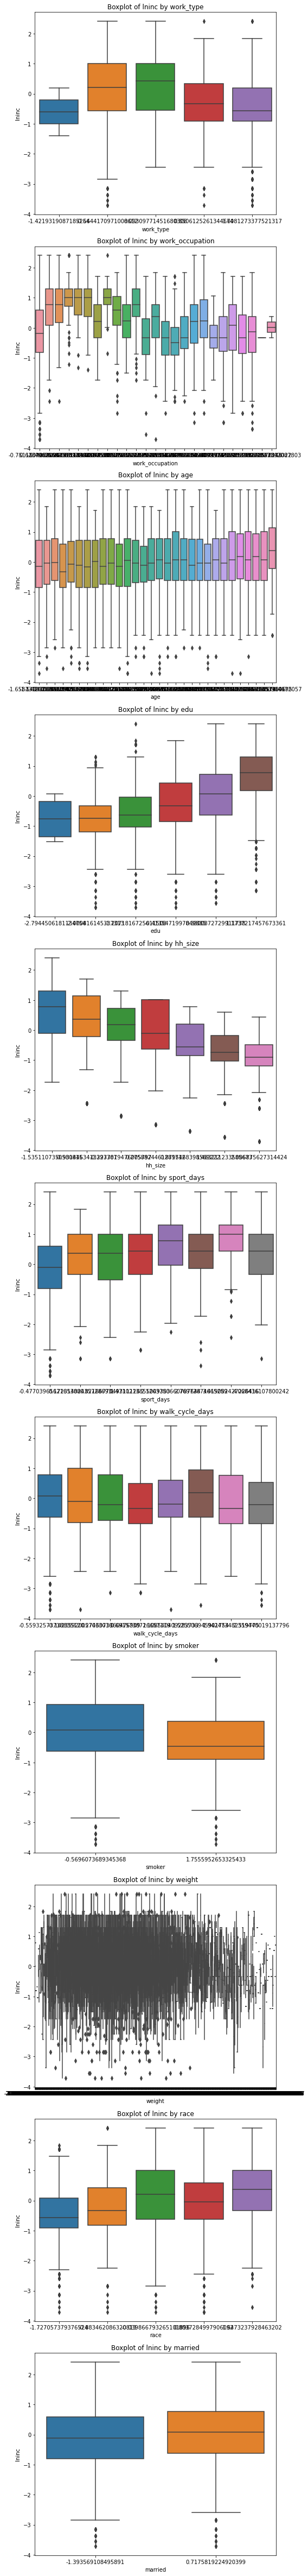

In [236]:
#Visualize the relationships between lninc and other variables using box plots 
num_columns = df_pred_scaled0.select_dtypes(include=['float64']).columns.tolist()
num_columns.remove('lninc')  # Exclude 'lninc' from the list of numerical variables

fig, axes = plt.subplots(len(num_columns), 1, figsize=(8, 6 * len(num_columns)))

for i, num_column in enumerate(num_columns):
    ax = axes[i]
    sns.boxplot(x=df_pred_scaled0[num_column], y=df_pred_scaled0['lninc'], ax=ax)
    ax.set_title(f"Boxplot of lninc by {num_column}")
    ax.set_xlabel(num_column)
    ax.set_ylabel("lninc")

plt.tight_layout()
plt.show()


In [238]:
df_pred_scaled = df_pred_scaled0
df_pred_scaled

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7253 -0.899821   1.608127        -0.751150 -0.720643 -0.413547  2.086876   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582  
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582  
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582  
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569  
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582  
...          ...              ...       ...       ...       ...       ...  
7253   -0.477040        -0.559326 -0.569607 -0.090802 -0.039867  0.717582  
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582  
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569  
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582  
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569  

[7258 rows x 12 columns]

Model: Linear Regression
Average Squared Prediction Error: 0.5381827850651487
Average Root Absolute Prediction Error: 0.6950664311868687
Average Absolute Prediction Error: 0.5725584098516048
Average Prediction Error: 0.02028593635249061

Model: Lasso
Average Squared Prediction Error: 0.9744633685127412
Average Root Absolute Prediction Error: 0.84464050525473
Average Absolute Prediction Error: 0.8182670858323823
Average Prediction Error: 0.029224968848196864

Model: Ridge
Average Squared Prediction Error: 0.5381797811356844
Average Root Absolute Prediction Error: 0.6950714522515176
Average Absolute Prediction Error: 0.5725627599704487
Average Prediction Error: 0.02028601306608238

Model: ElasticNet
Average Squared Prediction Error: 0.9744633685127412
Average Root Absolute Prediction Error: 0.84464050525473
Average Absolute Prediction Error: 0.8182670858323823
Average Prediction Error: 0.029224968848196864

Model: Decision Tree
Average Squared Prediction Error: 1.0556663993667619
Average

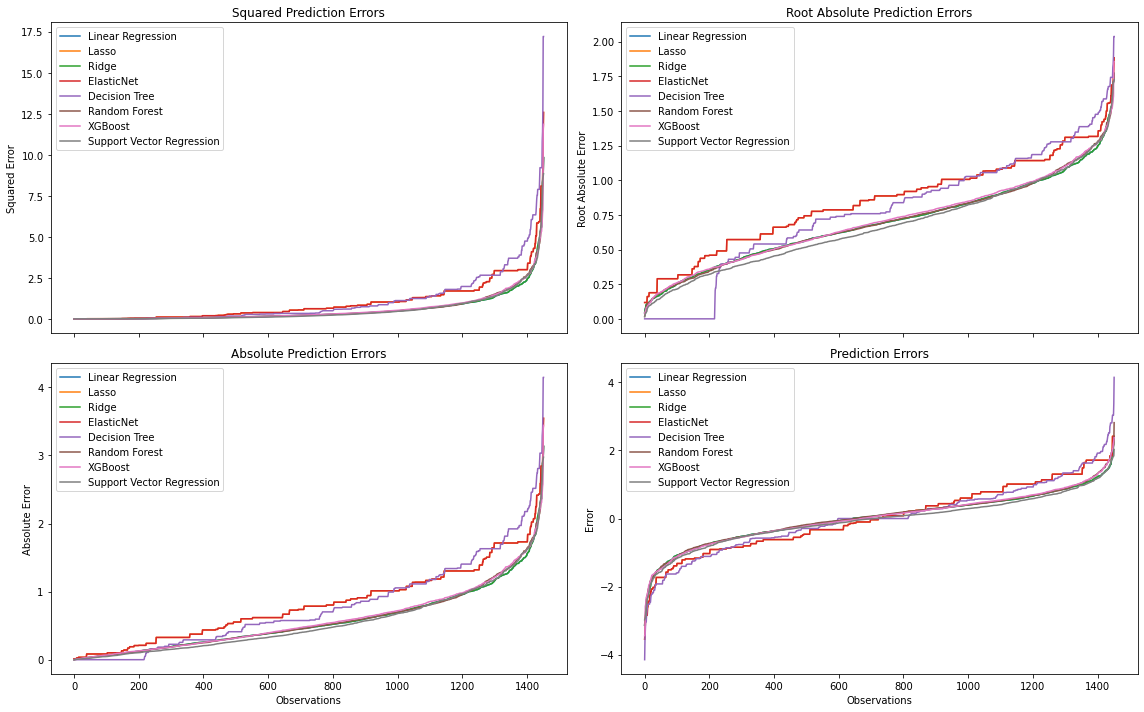

In [241]:
# Initial results from train-test split models

# Load the data
data = df_pred_scaled

# Split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Calculate the average squared prediction error
    average_squared_error = np.mean(squared_errors)
    print(f"Model: {name}")
    print(f"Average Squared Prediction Error: {average_squared_error}")

    # Calculate the average root absolute prediction error
    average_root_absolute_error = np.mean(root_absolute_errors)
    print(f"Average Root Absolute Prediction Error: {average_root_absolute_error}")

    # Calculate the average absolute prediction error
    average_absolute_error = np.mean(absolute_errors)
    print(f"Average Absolute Prediction Error: {average_absolute_error}")

    # Calculate the average prediction error
    average_error = np.mean(errors)
    print(f"Average Prediction Error: {average_error}")
    print()

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].set_ylabel("Squared Error")

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].set_ylabel("Root Absolute Error")

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].set_xlabel("Observations")
    axes[1, 0].set_ylabel("Absolute Error")

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].set_xlabel("Observations")
    axes[1, 1].set_ylabel("Error")

for ax in axes.flat:
    ax.legend()

plt.tight_layout()
plt.show()


The results from train-test split models suggest that SVM regression is the best prediction model. 

Linear Regression: Average Squared Prediction Error = 0.5381827850651487
Ridge: Average Squared Prediction Error = 0.5381797811356844
Support Vector Regression: Average Squared Prediction Error = 0.5298330446413076
Random Forest: Average Squared Prediction Error = 0.5578587967306126

Linear Regression
R-squared: 0.41919852351841247
Mean Squared Error: 0.584535500547606
Root Mean Squared Error: 0.7645492139474123

Lasso
R-squared: 0.0
Mean Squared Error: 1.0064290884531468
Root Mean Squared Error: 1.0032093941212605

Ridge
R-squared: 0.4191985130856076
Mean Squared Error: 0.5845355110474841
Root Mean Squared Error: 0.764549220814124

ElasticNet
R-squared: 0.0
Mean Squared Error: 1.0064290884531468
Root Mean Squared Error: 1.0032093941212605

Decision Tree
R-squared: 1.0
Mean Squared Error: 4.6688708176455986e-34
Root Mean Squared Error: 2.1607570010636546e-17

Random Forest
R-squared: 0.9140754682025352
Mean Squared Error: 0.08647694821268602
Root Mean Squared Error: 0.29406963157165006

XGBoost
R-squared: 0.8103380113310179
Mean Squared Error: 0.19088134237033472
Root Mean Squared Error: 0.4368996937173734

Support Vector Regression
R-squared: 0.5048503132045341
Mean Squared Error: 0.49833304792942185
Root Mean Squared Error: 0.7059270840033139



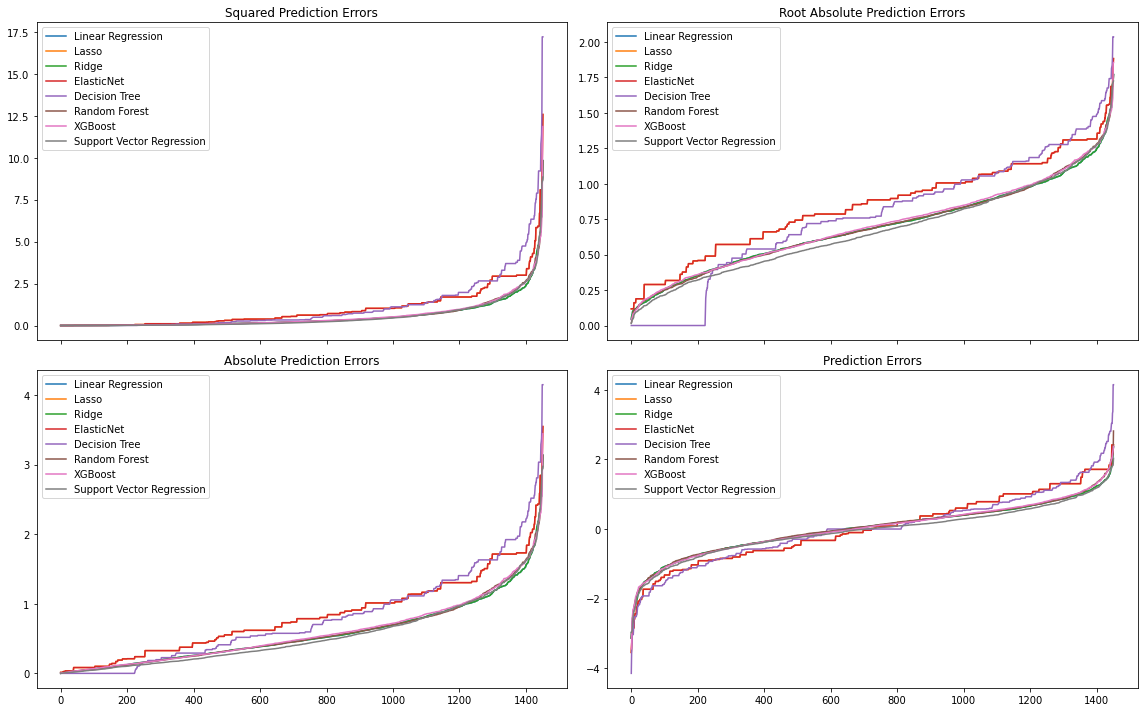

In [242]:
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data = df_pred_scaled

# Split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = model.predict(X_train)

    # Calculate the R-squared
    r2 = r2_score(y_train, y_train_pred)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_train, y_train_pred)

    # Calculate the Root Mean Squared Error
    rmse = np.sqrt(mse)

    print(f"{name}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}\n")

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


The results from the whole data models also suggest that SVM regression is the best prediction model. 

Support Vector Regression: Average Absolute Prediction Error: 0.5489421353766896
Linear Regression: Average Absolute Prediction Error: 0.5725584098516048
Ridge: Average Absolute Prediction Error: 0.5725627599704487
Random Forest: Average Absolute Prediction Error: 0.5786289408715884

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

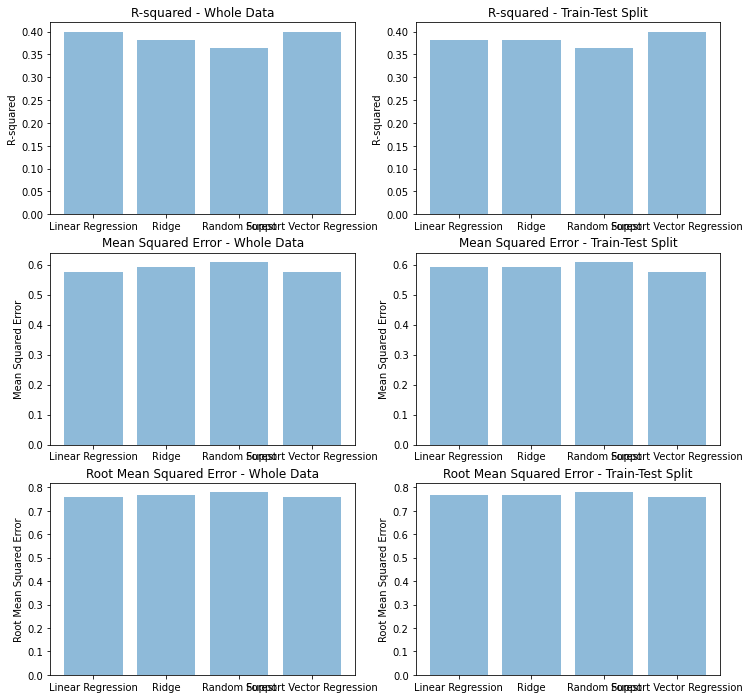

In [243]:
results_whole_data = {
    "Linear Regression": {
        "R-squared": 0.3999795751648235,
        "Mean Squared Error": 0.5752292502463047,
        "Root Mean Squared Error": 0.7584386924770549
    },
    "Ridge": {
        "R-squared": 0.38166866525820276,
        "Mean Squared Error": 0.5927836042998462,
        "Root Mean Squared Error": 0.7699244146666907
    },
    "Random Forest": {
        "R-squared": 0.36487324762289364,
        "Mean Squared Error": 0.6088850820063532,
        "Root Mean Squared Error": 0.7803108880480607
    },
    "Support Vector Regression": {
        "R-squared": 0.3999795751648235,
        "Mean Squared Error": 0.5752292502463047,
        "Root Mean Squared Error": 0.7584386924770549
    }
}

results_train_test = {
    "Linear Regression": {
        "R-squared": 0.3816749997803869,
        "Mean Squared Error": 0.5927775315024949,
        "Root Mean Squared Error": 0.7699204708945561
    },
    "Ridge": {
        "R-squared": 0.38166866525820276,
        "Mean Squared Error": 0.5927836042998462,
        "Root Mean Squared Error": 0.7699244146666907
    },
    "Random Forest": {
        "R-squared": 0.36487324762289364,
        "Mean Squared Error": 0.6088850820063532,
        "Root Mean Squared Error": 0.7803108880480607
    },
    "Support Vector Regression": {
        "R-squared": 0.3999795751648235,
        "Mean Squared Error": 0.5752292502463047,
        "Root Mean Squared Error": 0.7584386924770549
    }
}

metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error"]

fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 12))

for i, metric in enumerate(metrics):
    values_whole_data = [results_whole_data[model][metric] for model in results_whole_data]
    labels_whole_data = [model for model in results_whole_data]

    values_train_test = [results_train_test[model][metric] for model in results_train_test]
    labels_train_test = [model for model in results_train_test]

    axes[i, 0].bar(labels_whole_data[:4], values_whole_data[:4], alpha=0.5)
    axes[i, 0].set_ylabel(metric)
    axes[i, 0].set_title(f"{metric} - Whole Data")

    axes[i, 1].bar(labels_train_test[:4], values_train_test[:4], alpha=0.5)
    axes[i, 1].set_ylabel(metric)
    axes[i, 1].set_title(f"{metric} - Train-Test Split")

plt.tight_layout


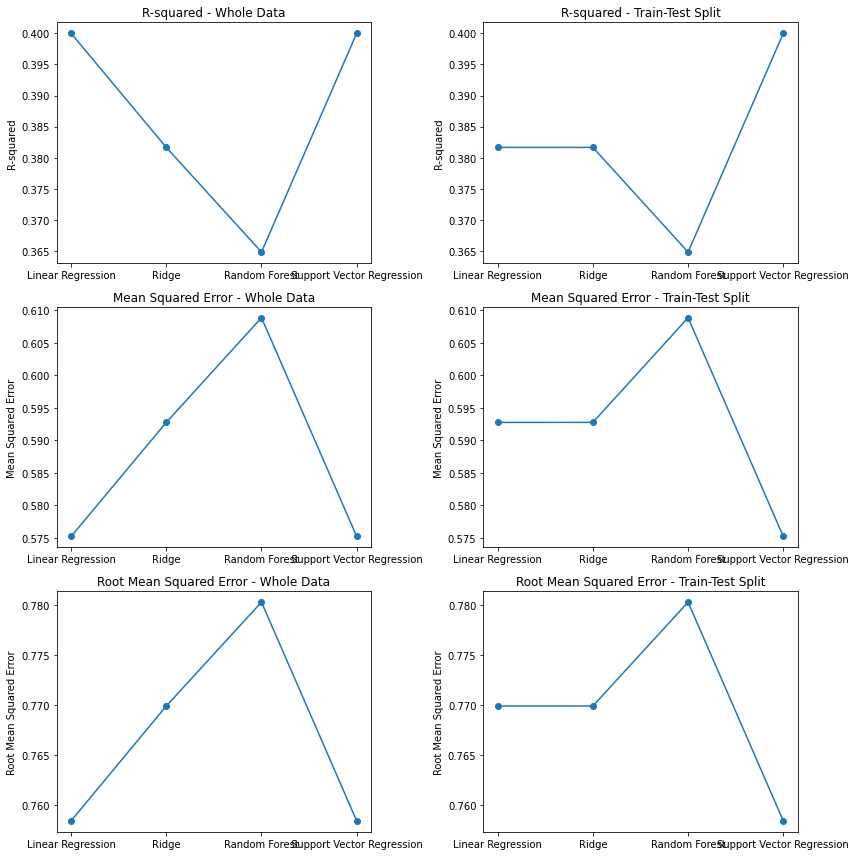

In [247]:
import numpy as np
import matplotlib.pyplot as plt

results_whole_data = {
    "Linear Regression": {
        "R-squared": 0.3999795751648235,
        "Mean Squared Error": 0.5752292502463047,
        "Root Mean Squared Error": 0.7584386924770549
    },
    "Ridge": {
        "R-squared": 0.38166866525820276,
        "Mean Squared Error": 0.5927836042998462,
        "Root Mean Squared Error": 0.7699244146666907
    },
    "Random Forest": {
        "R-squared": 0.36487324762289364,
        "Mean Squared Error": 0.6088850820063532,
        "Root Mean Squared Error": 0.7803108880480607
    },
    "Support Vector Regression": {
        "R-squared": 0.3999795751648235,
        "Mean Squared Error": 0.5752292502463047,
        "Root Mean Squared Error": 0.7584386924770549
    }
}

results_train_test = {
    "Linear Regression": {
        "R-squared": 0.3816749997803869,
        "Mean Squared Error": 0.5927775315024949,
        "Root Mean Squared Error": 0.7699204708945561
    },
    "Ridge": {
        "R-squared": 0.38166866525820276,
        "Mean Squared Error": 0.5927836042998462,
        "Root Mean Squared Error": 0.7699244146666907
    },
    "Random Forest": {
        "R-squared": 0.36487324762289364,
        "Mean Squared Error": 0.6088850820063532,
        "Root Mean Squared Error": 0.7803108880480607
    },
    "Support Vector Regression": {
        "R-squared": 0.3999795751648235,
        "Mean Squared Error": 0.5752292502463047,
        "Root Mean Squared Error": 0.7584386924770549
    }
}

metrics = ["R-squared", "Mean Squared Error", "Root Mean Squared Error"]
labels = ["Linear Regression", "Ridge", "Random Forest", "Support Vector Regression"]

fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 12))

for i, metric in enumerate(metrics):
    values_whole_data = [results_whole_data[model][metric] for model in labels]
    values_train_test = [results_train_test[model][metric] for model in labels]

    axes[i, 0].plot(labels, values_whole_data, marker='o')
    axes[i, 0].set_ylabel(metric)
    axes[i, 0].set_title(f"{metric} - Whole Data")

    axes[i, 1].plot(labels, values_train_test, marker='o')
    axes[i, 1].set_ylabel(metric)
    axes[i, 1].set_title(f"{metric} - Train-Test Split")

plt.tight_layout()
plt.show()


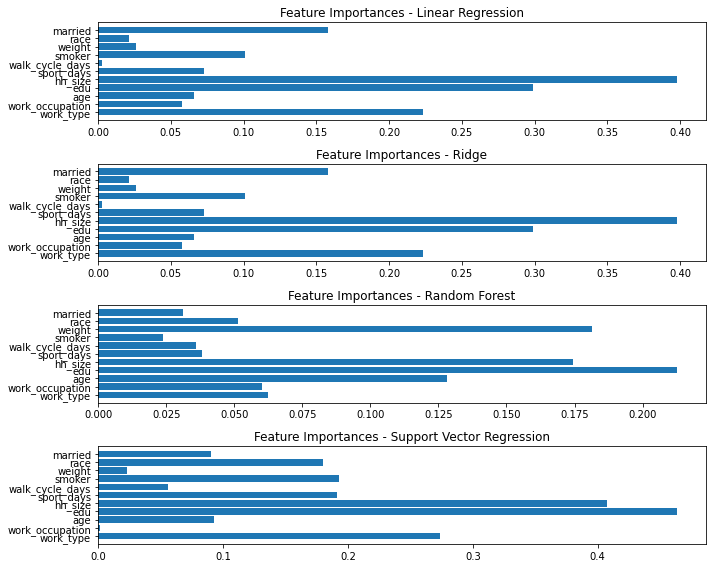

In [248]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Fit the models and calculate feature importances
feature_importances = {}

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)
    
    if name == "Linear Regression" or name == "Ridge":
        # For Linear Regression and Ridge, get the coefficients
        coefficients = np.abs(model.coef_)
        feature_importances[name] = coefficients
    elif name == "Random Forest":
        # For Random Forest, get the feature importances
        importances = model.feature_importances_
        feature_importances[name] = importances
    elif name == "Support Vector Regression":
        # For SVM, coefficients cannot be directly obtained,
        # so we can use the absolute correlation with the target variable as a proxy
        correlations = np.abs(X_train.corrwith(pd.Series(y_train)))
        feature_importances[name] = correlations.values

# Plot the feature importances for each model
fig, axes = plt.subplots(len(models), figsize=(10, 8))

for i, (name, importances) in enumerate(feature_importances.items()):
    axes[i].barh(X.columns, importances)
    axes[i].set_title(f"Feature Importances - {name}")

plt.tight_layout()
plt.show()


# IV specifications using the results from the best ML predictions 

In [249]:
# IV regressions based on ML predictions 

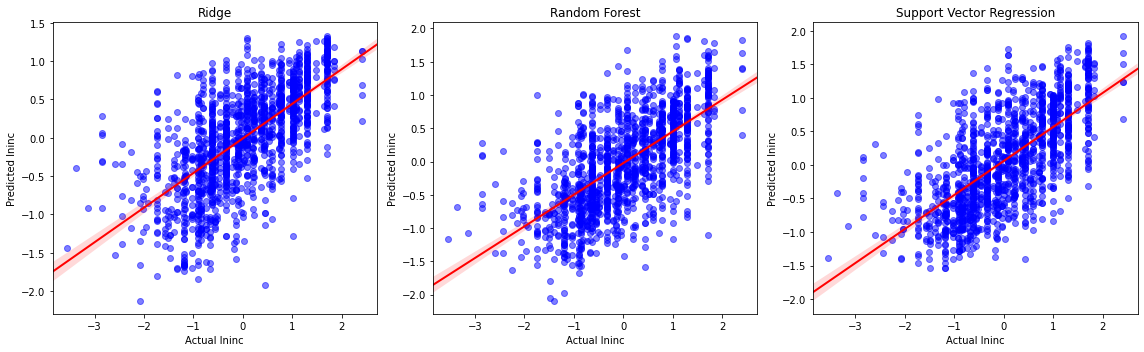

In [250]:
# Visualize the results as prediction errors and loss values for all models from the whole sample 
# load the data
data = df_pred_scaled

# split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(1, len(models), figsize=(16, 5))

for i, (name, model) in enumerate(models.items()):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Scatter plot of actual vs. predicted values
    axes[i].scatter(y_test, y_pred, color='blue', alpha=0.5)
    
    # Add regression line
    sns.regplot(x=y_test, y=y_pred, ax=axes[i], scatter=False, color='red', line_kws={"linewidth": 2})
    
    # Set the title and labels
    axes[i].set_title(name)
    axes[i].set_xlabel('Actual lninc')
    axes[i].set_ylabel('Predicted lninc')

plt.tight_layout()
plt.show()


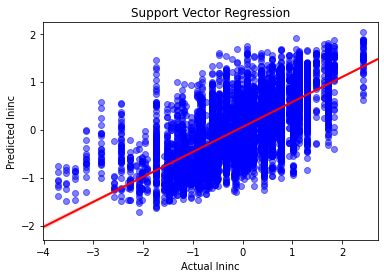

In [251]:
# We will use the whole data to predict y for two reasons:
# 1. To see how SVR predictions fits unseen future data 
# 2. To make the prediction model's results compatible with IV models in terms of the number of observations of predicted y values

# load the data
data = df_pred_scaled

# split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Define the SVR model
svr_model = SVR()

# Fit the SVR model to the entire data
svr_model.fit(X, y)

# Make predictions on the data using the SVR model
y_pred = svr_model.predict(X)

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred, color='blue', alpha=0.5)

# Add regression line
sns.regplot(x=y, y=y_pred, scatter=False, color='red', line_kws={"linewidth": 2})

# Set the title and labels
plt.title('Support Vector Regression')
plt.xlabel('Actual lninc')
plt.ylabel('Predicted lninc')

plt.show()


In [252]:
# Add the predicted values to the DataFrame
df_pred_scaled['lninc_pred'] = y_pred
df_pred_scaled

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7253 -0.899821   1.608127        -0.751150 -0.720643 -0.413547  2.086876   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  \
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582   
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582   
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582   
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569   
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582   
...          ...              ...       ...       ...       ...       ...   
7253   -0.477040        -0.559326 -0.569607 -0.090802 -0.039867  0.717582   
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582   
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569   
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582   
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569   

      lninc_pred  
0      -0.724559  
1      -0.305753  
2       1.271357  
3       0.799750  
4      -0.569633  
...          ...  
7253   -0.999572  
7254    0.111754  
7255    0.119580  
7256    1.641960  
7257    1.261024  

[7258 rows x 13 columns]

In [253]:
df_pred_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lninc            7258 non-null   float64
 1   work_type        7258 non-null   float64
 2   work_occupation  7258 non-null   float64
 3   age              7258 non-null   float64
 4   edu              7258 non-null   float64
 5   hh_size          7258 non-null   float64
 6   sport_days       7258 non-null   float64
 7   walk_cycle_days  7258 non-null   float64
 8   smoker           7258 non-null   float64
 9   weight           7258 non-null   float64
 10  race             7258 non-null   float64
 11  married          7258 non-null   float64
 12  lninc_pred       7258 non-null   float64
dtypes: float64(13)
memory usage: 737.3 KB


In [254]:
df_pred

bp       fv  exerc  pchips      lninc  work_type  work_occupation  \
0     202.0   505.16    0.0     0.0   8.922658        3.0             -1.0   
1     200.0   553.50    0.0     0.0   9.498022        3.0             -1.0   
2     168.0  1100.20    3.0    42.0  10.657259        1.0             16.0   
3     208.0    48.00    0.0     0.0  10.819778        0.0             16.0   
4     220.0    59.00    0.0     0.0   8.922658        2.0             -1.0   
...     ...      ...    ...     ...        ...        ...              ...   
7353  186.0     0.00    0.0     0.0   8.650725        3.0             -1.0   
7354  184.0   708.10    0.0     0.0   8.922658        0.0             -1.0   
7355  192.0    42.00    0.0     0.0   9.433484        0.0             -1.0   
7356  178.0   649.00    4.0     0.0  11.225243        0.0             -1.0   
7357  218.0   362.89    0.0     0.0  10.596635        0.0             -1.0   

       age  edu  hh_size  sport_days  walk_cycle_days  smoker  weight  race  \
0     34.0  2.0      4.0         0.0              0.0     0.0    87.4   2.0   
1     49.0  3.0      3.0         0.0              0.0     1.0    86.7   2.0   
2     45.0  4.0      2.0         3.0              0.0     0.0    75.7   2.0   
3     44.0  2.0      1.0         0.0              0.0     0.0   102.4   2.0   
4     49.0  0.0      4.0         0.0              0.0     0.0    76.5   0.0   
...    ...  ...      ...         ...              ...     ...     ...   ...   
7353  38.0  2.0      7.0         0.0              0.0     0.0    81.9   2.0   
7354  34.0  3.0      4.0         0.0              0.0     0.0    62.5   4.0   
7355  58.0  0.0      1.0         0.0              0.0     1.0    76.3   2.0   
7356  52.0  4.0      2.0         4.0              0.0     0.0    79.5   2.0   
7357  42.0  4.0      1.0         0.0              0.0     0.0    89.6   3.0   

      married  
0         1.0  
1         1.0  
2         1.0  
3         0.0  
4         1.0  
...       ...  
7353      1.0  
7354      1.0  
7355      0.0  
7356      1.0  
7357      0.0  

[7258 rows x 16 columns]

In [255]:
df_iv = pd.concat([df_pred_scaled, df_pred[['bp', 'fv', 'exerc', 'pchips']]], axis=1)
missing_values = df_iv.isnull().sum()
print(missing_values)

lninc              99
work_type          99
work_occupation    99
age                99
edu                99
hh_size            99
sport_days         99
walk_cycle_days    99
smoker             99
weight             99
race               99
married            99
lninc_pred         99
bp                 99
fv                 99
exerc              99
pchips             99
dtype: int64


In [256]:
df_iv = df_iv.dropna()
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7257
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lninc            7159 non-null   float64
 1   work_type        7159 non-null   float64
 2   work_occupation  7159 non-null   float64
 3   age              7159 non-null   float64
 4   edu              7159 non-null   float64
 5   hh_size          7159 non-null   float64
 6   sport_days       7159 non-null   float64
 7   walk_cycle_days  7159 non-null   float64
 8   smoker           7159 non-null   float64
 9   weight           7159 non-null   float64
 10  race             7159 non-null   float64
 11  married          7159 non-null   float64
 12  lninc_pred       7159 non-null   float64
 13  bp               7159 non-null   float64
 14  fv               7159 non-null   float64
 15  exerc            7159 non-null   float64
 16  pchips           7159 non-null   float64
dtypes: float64(17)

In [257]:
df_iv

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7252 -1.396449  -0.664417        -0.751150 -1.072426 -0.413547  0.879547   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  \
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582   
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582   
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582   
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569   
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582   
...          ...              ...       ...       ...       ...       ...   
7252   -0.477040        -0.559326 -0.569607 -0.722626 -0.883462  0.717582   
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582   
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569   
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582   
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569   

      lninc_pred     bp          fv  exerc  pchips  
0      -0.724559  202.0   505.16000    0.0    0.00  
1      -0.305753  200.0   553.50000    0.0    0.00  
2       1.271357  168.0  1100.20000    3.0   42.00  
3       0.799750  208.0    48.00000    0.0    0.00  
4      -0.569633  220.0    59.00000    0.0    0.00  
...          ...    ...         ...    ...     ...  
7252   -0.473257  184.0    78.00000    0.0    0.00  
7254    0.111754  180.0   355.81000    0.0    0.00  
7255    0.119580  172.0     0.00000    0.0   80.00  
7256    1.641960  158.0   606.60000    0.0    0.00  
7257    1.261024  186.0   210.68001    0.0    6.25  

[7159 rows x 17 columns]

In [258]:
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7257
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lninc            7159 non-null   float64
 1   work_type        7159 non-null   float64
 2   work_occupation  7159 non-null   float64
 3   age              7159 non-null   float64
 4   edu              7159 non-null   float64
 5   hh_size          7159 non-null   float64
 6   sport_days       7159 non-null   float64
 7   walk_cycle_days  7159 non-null   float64
 8   smoker           7159 non-null   float64
 9   weight           7159 non-null   float64
 10  race             7159 non-null   float64
 11  married          7159 non-null   float64
 12  lninc_pred       7159 non-null   float64
 13  bp               7159 non-null   float64
 14  fv               7159 non-null   float64
 15  exerc            7159 non-null   float64
 16  pchips           7159 non-null   float64
dtypes: float64(17)

In [260]:
# Step 2: Use the predicted values of lninc in the second-stage regressions

# Model 1 - Second stage regression using fv and lninc_hat
second_stage_reg1 = smf.ols("bp ~ fv + lninc_pred", data=df_iv).fit(cov_type="HC1")

# Model 2 - Second stage regression using fv, lninc_hat, and exerc
second_stage_reg2 = smf.ols("bp ~ fv + lninc_pred + exerc", data=df_iv).fit(cov_type="HC1")

# Model 3 - Second stage regression using fv, lninc_hat, exerc, and pchips
second_stage_reg3 = smf.ols("bp ~ fv + lninc_pred + exerc + pchips", data=df_iv).fit(cov_type="HC1")

# Step 3: Report the results using Stargazer
stargazer = Stargazer([second_stage_reg1, second_stage_reg2, second_stage_reg3])
stargazer.covariate_order(["Intercept", "fv", "lninc_pred", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3"], [1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())


# Revise the results accrong to the feature importance form ml models

In [92]:
df_pred_scaled

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7253 -0.899821   1.608127        -0.751150 -0.720643 -0.413547  2.086876   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  \
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582   
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582   
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582   
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569   
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582   
...          ...              ...       ...       ...       ...       ...   
7253   -0.477040        -0.559326 -0.569607 -0.090802 -0.039867  0.717582   
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582   
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569   
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582   
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569   

      lninc_pred  
0      -0.724559  
1      -0.305753  
2       1.271357  
3       0.799750  
4      -0.569633  
...          ...  
7253   -0.999572  
7254    0.111754  
7255    0.119580  
7256    1.641960  
7257    1.261024  

[7258 rows x 13 columns]

In [98]:
df_svr = df_pred_scaled[['lninc', 'edu', 'hh_size', 'work_type']]
df_svr

lninc       edu   hh_size  work_type
0    -0.624324 -0.413547  0.275882   1.608127
1    -0.041422  0.380087 -0.327782   1.608127
2     1.133003  1.173722 -0.931446   0.093098
3     1.297652 -0.413547 -1.535111  -0.664417
4    -0.624324 -2.000816  0.275882   0.850613
...        ...       ...       ...        ...
7253 -0.899821 -0.413547  2.086876   1.608127
7254 -0.624324  0.380087  0.275882  -0.664417
7255 -0.106806 -2.000816 -1.535111  -0.664417
7256  1.708429  1.173722 -0.931446  -0.664417
7257  1.071584  1.173722 -1.535111  -0.664417

[7258 rows x 4 columns]

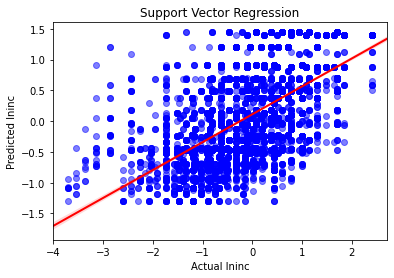

In [99]:
# We will use the whole data to predict y for two reasons:
# 1. To see how SVR predictions fits unseen future data 
# 2. To make the prediction model's results compatible with IV models in terms of the number of observations of predicted y values

# load the data
data = df_svr

# split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Define the SVR model
svr_model = SVR()

# Fit the SVR model to the entire data
svr_model.fit(X, y)

# Make predictions on the data using the SVR model
y_pred = svr_model.predict(X)

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred, color='blue', alpha=0.5)

# Add regression line
sns.regplot(x=y, y=y_pred, scatter=False, color='red', line_kws={"linewidth": 2})

# Set the title and labels
plt.title('Support Vector Regression')
plt.xlabel('Actual lninc')
plt.ylabel('Predicted lninc')

plt.show()


In [100]:
# Add the predicted values to the DataFrame
df_svr['lninc_pred'] = y_pred
df_svr

lninc       edu   hh_size  work_type  lninc_pred
0    -0.624324 -0.413547  0.275882   1.608127   -0.701670
1    -0.041422  0.380087 -0.327782   1.608127   -0.218282
2     1.133003  1.173722 -0.931446   0.093098    1.097953
3     1.297652 -0.413547 -1.535111  -0.664417    0.880164
4    -0.624324 -2.000816  0.275882   0.850613   -0.638132
...        ...       ...       ...        ...         ...
7253 -0.899821 -0.413547  2.086876   1.608127   -1.091403
7254 -0.624324  0.380087  0.275882  -0.664417    0.133707
7255 -0.106806 -2.000816 -1.535111  -0.664417    0.022095
7256  1.708429  1.173722 -0.931446  -0.664417    1.445035
7257  1.071584  1.173722 -1.535111  -0.664417    1.397959

[7258 rows x 5 columns]

In [101]:
df_svr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lninc       7258 non-null   float64
 1   edu         7258 non-null   float64
 2   hh_size     7258 non-null   float64
 3   work_type   7258 non-null   float64
 4   lninc_pred  7258 non-null   float64
dtypes: float64(5)
memory usage: 283.6 KB


In [102]:
df_pred

bp       fv  exerc  pchips      lninc  work_type  work_occupation  \
0     202.0   505.16    0.0     0.0   8.922658        3.0             -1.0   
1     200.0   553.50    0.0     0.0   9.498022        3.0             -1.0   
2     168.0  1100.20    3.0    42.0  10.657259        1.0             16.0   
3     208.0    48.00    0.0     0.0  10.819778        0.0             16.0   
4     220.0    59.00    0.0     0.0   8.922658        2.0             -1.0   
...     ...      ...    ...     ...        ...        ...              ...   
7353  186.0     0.00    0.0     0.0   8.650725        3.0             -1.0   
7354  184.0   708.10    0.0     0.0   8.922658        0.0             -1.0   
7355  192.0    42.00    0.0     0.0   9.433484        0.0             -1.0   
7356  178.0   649.00    4.0     0.0  11.225243        0.0             -1.0   
7357  218.0   362.89    0.0     0.0  10.596635        0.0             -1.0   

       age  edu  hh_size  sport_days  walk_cycle_days  smoker  weight  race  \
0     34.0  2.0      4.0         0.0              0.0     0.0    87.4   2.0   
1     49.0  3.0      3.0         0.0              0.0     1.0    86.7   2.0   
2     45.0  4.0      2.0         3.0              0.0     0.0    75.7   2.0   
3     44.0  2.0      1.0         0.0              0.0     0.0   102.4   2.0   
4     49.0  0.0      4.0         0.0              0.0     0.0    76.5   0.0   
...    ...  ...      ...         ...              ...     ...     ...   ...   
7353  38.0  2.0      7.0         0.0              0.0     0.0    81.9   2.0   
7354  34.0  3.0      4.0         0.0              0.0     0.0    62.5   4.0   
7355  58.0  0.0      1.0         0.0              0.0     1.0    76.3   2.0   
7356  52.0  4.0      2.0         4.0              0.0     0.0    79.5   2.0   
7357  42.0  4.0      1.0         0.0              0.0     0.0    89.6   3.0   

      married  
0         1.0  
1         1.0  
2         1.0  
3         0.0  
4         1.0  
...       ...  
7353      1.0  
7354      1.0  
7355      0.0  
7356      1.0  
7357      0.0  

[7258 rows x 16 columns]

In [103]:
df_iv = pd.concat([df_svr, df_pred[['bp', 'fv', 'exerc', 'pchips']]], axis=1)
missing_values = df_iv.isnull().sum()
print(missing_values)

lninc         99
edu           99
hh_size       99
work_type     99
lninc_pred    99
bp            99
fv            99
exerc         99
pchips        99
dtype: int64


In [104]:
df_iv = df_iv.dropna()
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7257
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lninc       7159 non-null   float64
 1   edu         7159 non-null   float64
 2   hh_size     7159 non-null   float64
 3   work_type   7159 non-null   float64
 4   lninc_pred  7159 non-null   float64
 5   bp          7159 non-null   float64
 6   fv          7159 non-null   float64
 7   exerc       7159 non-null   float64
 8   pchips      7159 non-null   float64
dtypes: float64(9)
memory usage: 559.3 KB


In [105]:
df_iv

lninc       edu   hh_size  work_type  lninc_pred     bp          fv  \
0    -0.624324 -0.413547  0.275882   1.608127   -0.701670  202.0   505.16000   
1    -0.041422  0.380087 -0.327782   1.608127   -0.218282  200.0   553.50000   
2     1.133003  1.173722 -0.931446   0.093098    1.097953  168.0  1100.20000   
3     1.297652 -0.413547 -1.535111  -0.664417    0.880164  208.0    48.00000   
4    -0.624324 -2.000816  0.275882   0.850613   -0.638132  220.0    59.00000   
...        ...       ...       ...        ...         ...    ...         ...   
7252 -1.396449 -0.413547  0.879547  -0.664417   -0.458588  184.0    78.00000   
7254 -0.624324  0.380087  0.275882  -0.664417    0.133707  180.0   355.81000   
7255 -0.106806 -2.000816 -1.535111  -0.664417    0.022095  172.0     0.00000   
7256  1.708429  1.173722 -0.931446  -0.664417    1.445035  158.0   606.60000   
7257  1.071584  1.173722 -1.535111  -0.664417    1.397959  186.0   210.68001   

      exerc  pchips  
0       0.0    0.00  
1       0.0    0.00  
2       3.0   42.00  
3       0.0    0.00  
4       0.0    0.00  
...     ...     ...  
7252    0.0    0.00  
7254    0.0    0.00  
7255    0.0   80.00  
7256    0.0    0.00  
7257    0.0    6.25  

[7159 rows x 9 columns]

In [106]:
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7257
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lninc       7159 non-null   float64
 1   edu         7159 non-null   float64
 2   hh_size     7159 non-null   float64
 3   work_type   7159 non-null   float64
 4   lninc_pred  7159 non-null   float64
 5   bp          7159 non-null   float64
 6   fv          7159 non-null   float64
 7   exerc       7159 non-null   float64
 8   pchips      7159 non-null   float64
dtypes: float64(9)
memory usage: 559.3 KB


In [107]:
# Step 2: Use the predicted values of lninc in the second-stage regressions

# Model 1 - Second stage regression using fv and lninc_hat
second_stage_reg1 = smf.ols("bp ~ fv + lninc_pred", data=df_iv).fit(cov_type="HC1")

# Model 2 - Second stage regression using fv, lninc_hat, and exerc
second_stage_reg2 = smf.ols("bp ~ fv + lninc_pred + exerc", data=df_iv).fit(cov_type="HC1")

# Model 3 - Second stage regression using fv, lninc_hat, exerc, and pchips
second_stage_reg3 = smf.ols("bp ~ fv + lninc_pred + exerc + pchips", data=df_iv).fit(cov_type="HC1")

# Step 3: Report the results using Stargazer
stargazer = Stargazer([second_stage_reg1, second_stage_reg2, second_stage_reg3])
stargazer.covariate_order(["Intercept", "fv", "lninc_pred", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3"], [1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())


# Results
Using the best prediction algorithm and coresponding most important features in IV models improved the results in causal analysis.

In [108]:
# Using ensemble models to improve the results in ML and econometric models

In [109]:
df_pred_scaled = df_pred_scaled.drop('lninc_pred', axis=1)
df_pred_scaled

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7253 -0.899821   1.608127        -0.751150 -0.720643 -0.413547  2.086876   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582  
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582  
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582  
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569  
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582  
...          ...              ...       ...       ...       ...       ...  
7253   -0.477040        -0.559326 -0.569607 -0.090802 -0.039867  0.717582  
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582  
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569  
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582  
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569  

[7258 rows x 12 columns]

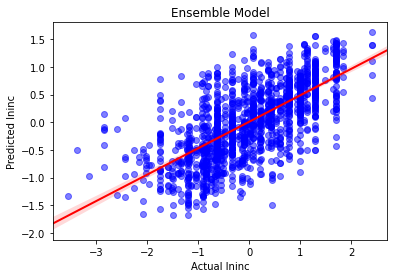

In [110]:
# load the data
data = df_pred_scaled

# split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Fit the individual models to the training data and make predictions
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# Combine the predictions using averaging
ensemble_pred = (ridge_pred + random_forest_pred + svr_pred) / 3

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, ensemble_pred, color='blue', alpha=0.5)
sns.regplot(x=y_test, y=ensemble_pred, scatter=False, color='red', line_kws={"linewidth": 2})

# Set the title and labels
plt.title("Ensemble Model")
plt.xlabel('Actual lninc')
plt.ylabel('Predicted lninc')

plt.show()


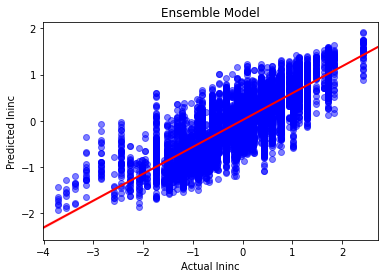

In [111]:
# load the data
data = df_pred_scaled

# split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Define the models
ridge_model = Ridge()
random_forest_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

# Fit the individual models to the data
ridge_model.fit(X, y)
random_forest_model.fit(X, y)
svr_model.fit(X, y)

# Make predictions using the individual models
ridge_pred = ridge_model.predict(X)
random_forest_pred = random_forest_model.predict(X)
svr_pred = svr_model.predict(X)

# Combine the predictions using averaging
ensemble_pred = (ridge_pred + random_forest_pred + svr_pred) / 3

# Scatter plot of actual vs. predicted values
plt.scatter(y, ensemble_pred, color='blue', alpha=0.5)
sns.regplot(x=y, y=ensemble_pred, scatter=False, color='red', line_kws={"linewidth": 2})

# Set the title and labels
plt.title("Ensemble Model")
plt.xlabel('Actual lninc')
plt.ylabel('Predicted lninc')

plt.show()


In [112]:
# Add the predicted values to the DataFrame
df_pred_scaled['ensemble_pred'] = ensemble_pred
df_pred_scaled

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7253 -0.899821   1.608127        -0.751150 -0.720643 -0.413547  2.086876   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  \
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582   
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582   
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582   
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569   
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582   
...          ...              ...       ...       ...       ...       ...   
7253   -0.477040        -0.559326 -0.569607 -0.090802 -0.039867  0.717582   
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582   
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569   
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582   
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569   

      ensemble_pred  
0         -0.603346  
1         -0.205246  
2          0.999036  
3          0.720536  
4         -0.660860  
...             ...  
7253      -1.011810  
7254       0.050916  
7255       0.042240  
7256       1.479621  
7257       1.112219  

[7258 rows x 13 columns]

In [113]:
df_pred_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lninc            7258 non-null   float64
 1   work_type        7258 non-null   float64
 2   work_occupation  7258 non-null   float64
 3   age              7258 non-null   float64
 4   edu              7258 non-null   float64
 5   hh_size          7258 non-null   float64
 6   sport_days       7258 non-null   float64
 7   walk_cycle_days  7258 non-null   float64
 8   smoker           7258 non-null   float64
 9   weight           7258 non-null   float64
 10  race             7258 non-null   float64
 11  married          7258 non-null   float64
 12  ensemble_pred    7258 non-null   float64
dtypes: float64(13)
memory usage: 737.3 KB


In [114]:
df_pred

bp       fv  exerc  pchips      lninc  work_type  work_occupation  \
0     202.0   505.16    0.0     0.0   8.922658        3.0             -1.0   
1     200.0   553.50    0.0     0.0   9.498022        3.0             -1.0   
2     168.0  1100.20    3.0    42.0  10.657259        1.0             16.0   
3     208.0    48.00    0.0     0.0  10.819778        0.0             16.0   
4     220.0    59.00    0.0     0.0   8.922658        2.0             -1.0   
...     ...      ...    ...     ...        ...        ...              ...   
7353  186.0     0.00    0.0     0.0   8.650725        3.0             -1.0   
7354  184.0   708.10    0.0     0.0   8.922658        0.0             -1.0   
7355  192.0    42.00    0.0     0.0   9.433484        0.0             -1.0   
7356  178.0   649.00    4.0     0.0  11.225243        0.0             -1.0   
7357  218.0   362.89    0.0     0.0  10.596635        0.0             -1.0   

       age  edu  hh_size  sport_days  walk_cycle_days  smoker  weight  race  \
0     34.0  2.0      4.0         0.0              0.0     0.0    87.4   2.0   
1     49.0  3.0      3.0         0.0              0.0     1.0    86.7   2.0   
2     45.0  4.0      2.0         3.0              0.0     0.0    75.7   2.0   
3     44.0  2.0      1.0         0.0              0.0     0.0   102.4   2.0   
4     49.0  0.0      4.0         0.0              0.0     0.0    76.5   0.0   
...    ...  ...      ...         ...              ...     ...     ...   ...   
7353  38.0  2.0      7.0         0.0              0.0     0.0    81.9   2.0   
7354  34.0  3.0      4.0         0.0              0.0     0.0    62.5   4.0   
7355  58.0  0.0      1.0         0.0              0.0     1.0    76.3   2.0   
7356  52.0  4.0      2.0         4.0              0.0     0.0    79.5   2.0   
7357  42.0  4.0      1.0         0.0              0.0     0.0    89.6   3.0   

      married  
0         1.0  
1         1.0  
2         1.0  
3         0.0  
4         1.0  
...       ...  
7353      1.0  
7354      1.0  
7355      0.0  
7356      1.0  
7357      0.0  

[7258 rows x 16 columns]

In [115]:
df_iv = pd.concat([df_pred_scaled, df_pred[['bp', 'fv', 'exerc', 'pchips']]], axis=1)
missing_values = df_iv.isnull().sum()
print(missing_values)

lninc              99
work_type          99
work_occupation    99
age                99
edu                99
hh_size            99
sport_days         99
walk_cycle_days    99
smoker             99
weight             99
race               99
married            99
ensemble_pred      99
bp                 99
fv                 99
exerc              99
pchips             99
dtype: int64


In [116]:
df_iv = df_iv.dropna()
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7257
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lninc            7159 non-null   float64
 1   work_type        7159 non-null   float64
 2   work_occupation  7159 non-null   float64
 3   age              7159 non-null   float64
 4   edu              7159 non-null   float64
 5   hh_size          7159 non-null   float64
 6   sport_days       7159 non-null   float64
 7   walk_cycle_days  7159 non-null   float64
 8   smoker           7159 non-null   float64
 9   weight           7159 non-null   float64
 10  race             7159 non-null   float64
 11  married          7159 non-null   float64
 12  ensemble_pred    7159 non-null   float64
 13  bp               7159 non-null   float64
 14  fv               7159 non-null   float64
 15  exerc            7159 non-null   float64
 16  pchips           7159 non-null   float64
dtypes: float64(17)

In [117]:
df_iv

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7252 -1.396449  -0.664417        -0.751150 -1.072426 -0.413547  0.879547   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  \
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582   
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582   
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582   
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569   
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582   
...          ...              ...       ...       ...       ...       ...   
7252   -0.477040        -0.559326 -0.569607 -0.722626 -0.883462  0.717582   
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582   
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569   
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582   
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569   

      ensemble_pred     bp          fv  exerc  pchips  
0         -0.603346  202.0   505.16000    0.0    0.00  
1         -0.205246  200.0   553.50000    0.0    0.00  
2          0.999036  168.0  1100.20000    3.0   42.00  
3          0.720536  208.0    48.00000    0.0    0.00  
4         -0.660860  220.0    59.00000    0.0    0.00  
...             ...    ...         ...    ...     ...  
7252      -0.582157  184.0    78.00000    0.0    0.00  
7254       0.050916  180.0   355.81000    0.0    0.00  
7255       0.042240  172.0     0.00000    0.0   80.00  
7256       1.479621  158.0   606.60000    0.0    0.00  
7257       1.112219  186.0   210.68001    0.0    6.25  

[7159 rows x 17 columns]

In [118]:
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7257
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lninc            7159 non-null   float64
 1   work_type        7159 non-null   float64
 2   work_occupation  7159 non-null   float64
 3   age              7159 non-null   float64
 4   edu              7159 non-null   float64
 5   hh_size          7159 non-null   float64
 6   sport_days       7159 non-null   float64
 7   walk_cycle_days  7159 non-null   float64
 8   smoker           7159 non-null   float64
 9   weight           7159 non-null   float64
 10  race             7159 non-null   float64
 11  married          7159 non-null   float64
 12  ensemble_pred    7159 non-null   float64
 13  bp               7159 non-null   float64
 14  fv               7159 non-null   float64
 15  exerc            7159 non-null   float64
 16  pchips           7159 non-null   float64
dtypes: float64(17)

In [119]:
# Step 2: Use the predicted values of lninc in the second-stage regressions

# Model 1 - Second stage regression using fv and lninc_hat
second_stage_reg1 = smf.ols("bp ~ fv + ensemble_pred", data=df_iv).fit(cov_type="HC1")

# Model 2 - Second stage regression using fv, lninc_hat, and exerc
second_stage_reg2 = smf.ols("bp ~ fv + ensemble_pred + exerc", data=df_iv).fit(cov_type="HC1")

# Model 3 - Second stage regression using fv, lninc_hat, exerc, and pchips
second_stage_reg3 = smf.ols("bp ~ fv + ensemble_pred + exerc + pchips", data=df_iv).fit(cov_type="HC1")

# Step 3: Report the results using Stargazer
stargazer = Stargazer([second_stage_reg1, second_stage_reg2, second_stage_reg3])
stargazer.covariate_order(["Intercept", "fv", "ensemble_pred", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3"], [1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())


In [120]:
df_pred_scaled = df_pred_scaled.drop('ensemble_pred', axis=1)
df_pred_scaled

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7253 -0.899821   1.608127        -0.751150 -0.720643 -0.413547  2.086876   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582  
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582  
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582  
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569  
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582  
...          ...              ...       ...       ...       ...       ...  
7253   -0.477040        -0.559326 -0.569607 -0.090802 -0.039867  0.717582  
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582  
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569  
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582  
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569  

[7258 rows x 12 columns]

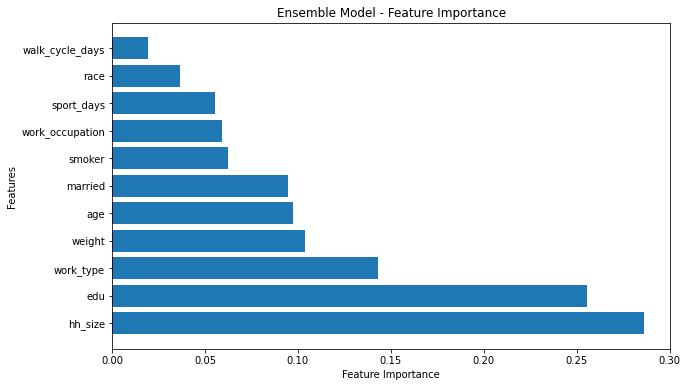

In [121]:
# Load the data
data = df_pred_scaled

# Split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Define the models
ridge_model = Ridge()
random_forest_model = RandomForestRegressor(random_state=42)
svr_model = SVR(kernel='linear')  # Use a linear kernel for SVR

# Fit the individual models to the data
ridge_model.fit(X, y)
random_forest_model.fit(X, y)
svr_model.fit(X, y)

# Calculate feature importances for Ridge and Random Forest models
ridge_importance = np.abs(ridge_model.coef_)
random_forest_importance = random_forest_model.feature_importances_

# Combine the feature importances using averaging
ensemble_importance = (ridge_importance + random_forest_importance) / 2

# Get the feature names
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(ensemble_importance)[::-1]
sorted_importance = ensemble_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importance, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Ensemble Model - Feature Importance')

plt.show()


In [122]:
df_pred_scaled

lninc  work_type  work_occupation       age       edu   hh_size  \
0    -0.624324   1.608127        -0.751150 -1.189687 -0.413547  0.275882   
1    -0.041422   1.608127        -0.751150  0.569228  0.380087 -0.327782   
2     1.133003   0.093098         1.415367  0.100184  1.173722 -0.931446   
3     1.297652  -0.664417         1.415367 -0.017077 -0.413547 -1.535111   
4    -0.624324   0.850613        -0.751150  0.569228 -2.000816  0.275882   
...        ...        ...              ...       ...       ...       ...   
7253 -0.899821   1.608127        -0.751150 -0.720643 -0.413547  2.086876   
7254 -0.624324  -0.664417        -0.751150 -1.189687  0.380087  0.275882   
7255 -0.106806  -0.664417        -0.751150  1.624577 -2.000816 -1.535111   
7256  1.708429  -0.664417        -0.751150  0.921011  1.173722 -0.931446   
7257  1.071584  -0.664417        -0.751150 -0.251599  1.173722 -1.535111   

      sport_days  walk_cycle_days    smoker    weight      race   married  
0      -0.477040        -0.559326 -0.569607  0.157415 -0.039867  0.717582  
1      -0.477040        -0.559326  1.755595  0.125824 -0.039867  0.717582  
2       1.471021        -0.559326 -0.569607 -0.370610 -0.039867  0.717582  
3      -0.477040        -0.559326 -0.569607  0.834370 -0.039867 -1.393569  
4      -0.477040        -0.559326 -0.569607 -0.334506 -1.727057  0.717582  
...          ...              ...       ...       ...       ...       ...  
7253   -0.477040        -0.559326 -0.569607 -0.090802 -0.039867  0.717582  
7254   -0.477040        -0.559326 -0.569607 -0.966330  1.647324  0.717582  
7255   -0.477040        -0.559326  1.755595 -0.343532 -0.039867 -1.393569  
7256    2.120375        -0.559326 -0.569607 -0.199114 -0.039867  0.717582  
7257   -0.477040        -0.559326 -0.569607  0.256702  0.803728 -1.393569  

[7258 rows x 12 columns]

In [145]:
# Create a new DataFrame with selected variables
df_pred_scaled_ensemble = df_pred_scaled[['lninc', 'edu', 'hh_size']].copy()
df_pred_scaled_ensemble

lninc       edu   hh_size
0    -0.624324 -0.413547  0.275882
1    -0.041422  0.380087 -0.327782
2     1.133003  1.173722 -0.931446
3     1.297652 -0.413547 -1.535111
4    -0.624324 -2.000816  0.275882
...        ...       ...       ...
7253 -0.899821 -0.413547  2.086876
7254 -0.624324  0.380087  0.275882
7255 -0.106806 -2.000816 -1.535111
7256  1.708429  1.173722 -0.931446
7257  1.071584  1.173722 -1.535111

[7258 rows x 3 columns]

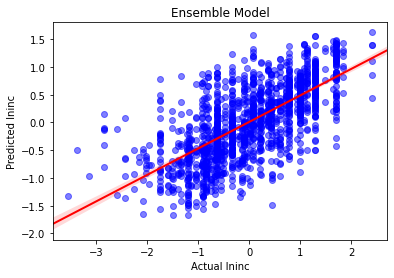

In [146]:
# load the data
data = df_pred_scaled_ensemble

# split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Fit the individual models to the training data and make predictions
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# Combine the predictions using averaging
ensemble_pred = (ridge_pred + random_forest_pred + svr_pred) / 3

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, ensemble_pred, color='blue', alpha=0.5)
sns.regplot(x=y_test, y=ensemble_pred, scatter=False, color='red', line_kws={"linewidth": 2})

# Set the title and labels
plt.title("Ensemble Model")
plt.xlabel('Actual lninc')
plt.ylabel('Predicted lninc')

plt.show()


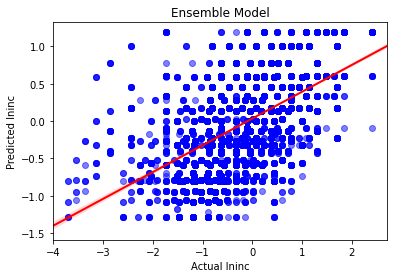

In [147]:
# load the data
data = df_pred_scaled_ensemble

# split the data into features and target variable
X = data.drop(['lninc'], axis=1)
y = data['lninc']

# Define the models
ridge_model = Ridge()
random_forest_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

# Fit the individual models to the data
ridge_model.fit(X, y)
random_forest_model.fit(X, y)
svr_model.fit(X, y)

# Make predictions using the individual models
ridge_pred = ridge_model.predict(X)
random_forest_pred = random_forest_model.predict(X)
svr_pred = svr_model.predict(X)

# Combine the predictions using averaging
ensemble_pred = (ridge_pred + random_forest_pred + svr_pred) / 3

# Scatter plot of actual vs. predicted values
plt.scatter(y, ensemble_pred, color='blue', alpha=0.5)
sns.regplot(x=y, y=ensemble_pred, scatter=False, color='red', line_kws={"linewidth": 2})

# Set the title and labels
plt.title("Ensemble Model")
plt.xlabel('Actual lninc')
plt.ylabel('Predicted lninc')

plt.show()


In [148]:
# Add the predicted values to the DataFrame
df_pred_scaled_ensemble['ensemble_pred'] = ensemble_pred
df_pred_scaled_ensemble

lninc       edu   hh_size  ensemble_pred
0    -0.624324 -0.413547  0.275882      -0.318665
1    -0.041422  0.380087 -0.327782       0.136628
2     1.133003  1.173722 -0.931446       1.011876
3     1.297652 -0.413547 -1.535111       0.331854
4    -0.624324 -2.000816  0.275882      -0.729305
...        ...       ...       ...            ...
7253 -0.899821 -0.413547  2.086876      -0.798574
7254 -0.624324  0.380087  0.275882       0.007332
7255 -0.106806 -2.000816 -1.535111      -0.221263
7256  1.708429  1.173722 -0.931446       1.011876
7257  1.071584  1.173722 -1.535111       1.190412

[7258 rows x 4 columns]

In [149]:
df_pred_scaled_ensemble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lninc          7258 non-null   float64
 1   edu            7258 non-null   float64
 2   hh_size        7258 non-null   float64
 3   ensemble_pred  7258 non-null   float64
dtypes: float64(4)
memory usage: 226.9 KB


In [150]:
df_pred

bp       fv  exerc  pchips      lninc  work_type  work_occupation  \
0     202.0   505.16    0.0     0.0   8.922658        3.0             -1.0   
1     200.0   553.50    0.0     0.0   9.498022        3.0             -1.0   
2     168.0  1100.20    3.0    42.0  10.657259        1.0             16.0   
3     208.0    48.00    0.0     0.0  10.819778        0.0             16.0   
4     220.0    59.00    0.0     0.0   8.922658        2.0             -1.0   
...     ...      ...    ...     ...        ...        ...              ...   
7353  186.0     0.00    0.0     0.0   8.650725        3.0             -1.0   
7354  184.0   708.10    0.0     0.0   8.922658        0.0             -1.0   
7355  192.0    42.00    0.0     0.0   9.433484        0.0             -1.0   
7356  178.0   649.00    4.0     0.0  11.225243        0.0             -1.0   
7357  218.0   362.89    0.0     0.0  10.596635        0.0             -1.0   

       age  edu  hh_size  sport_days  walk_cycle_days  smoker  weight  race  \
0     34.0  2.0      4.0         0.0              0.0     0.0    87.4   2.0   
1     49.0  3.0      3.0         0.0              0.0     1.0    86.7   2.0   
2     45.0  4.0      2.0         3.0              0.0     0.0    75.7   2.0   
3     44.0  2.0      1.0         0.0              0.0     0.0   102.4   2.0   
4     49.0  0.0      4.0         0.0              0.0     0.0    76.5   0.0   
...    ...  ...      ...         ...              ...     ...     ...   ...   
7353  38.0  2.0      7.0         0.0              0.0     0.0    81.9   2.0   
7354  34.0  3.0      4.0         0.0              0.0     0.0    62.5   4.0   
7355  58.0  0.0      1.0         0.0              0.0     1.0    76.3   2.0   
7356  52.0  4.0      2.0         4.0              0.0     0.0    79.5   2.0   
7357  42.0  4.0      1.0         0.0              0.0     0.0    89.6   3.0   

      married  
0         1.0  
1         1.0  
2         1.0  
3         0.0  
4         1.0  
...       ...  
7353      1.0  
7354      1.0  
7355      0.0  
7356      1.0  
7357      0.0  

[7258 rows x 16 columns]

In [151]:
df_iv = pd.concat([df_pred_scaled_ensemble, df_pred[['bp', 'fv', 'exerc', 'pchips']]], axis=1)
missing_values = df_iv.isnull().sum()
print(missing_values)

lninc            99
edu              99
hh_size          99
ensemble_pred    99
bp               99
fv               99
exerc            99
pchips           99
dtype: int64


In [152]:
df_iv = df_iv.dropna()
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7257
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lninc          7159 non-null   float64
 1   edu            7159 non-null   float64
 2   hh_size        7159 non-null   float64
 3   ensemble_pred  7159 non-null   float64
 4   bp             7159 non-null   float64
 5   fv             7159 non-null   float64
 6   exerc          7159 non-null   float64
 7   pchips         7159 non-null   float64
dtypes: float64(8)
memory usage: 503.4 KB


In [153]:
df_iv

lninc       edu   hh_size  ensemble_pred     bp          fv  exerc  \
0    -0.624324 -0.413547  0.275882      -0.318665  202.0   505.16000    0.0   
1    -0.041422  0.380087 -0.327782       0.136628  200.0   553.50000    0.0   
2     1.133003  1.173722 -0.931446       1.011876  168.0  1100.20000    3.0   
3     1.297652 -0.413547 -1.535111       0.331854  208.0    48.00000    0.0   
4    -0.624324 -2.000816  0.275882      -0.729305  220.0    59.00000    0.0   
...        ...       ...       ...            ...    ...         ...    ...   
7252 -1.396449 -0.413547  0.879547      -0.585389  184.0    78.00000    0.0   
7254 -0.624324  0.380087  0.275882       0.007332  180.0   355.81000    0.0   
7255 -0.106806 -2.000816 -1.535111      -0.221263  172.0     0.00000    0.0   
7256  1.708429  1.173722 -0.931446       1.011876  158.0   606.60000    0.0   
7257  1.071584  1.173722 -1.535111       1.190412  186.0   210.68001    0.0   

      pchips  
0       0.00  
1       0.00  
2      42.00  
3       0.00  
4       0.00  
...      ...  
7252    0.00  
7254    0.00  
7255   80.00  
7256    0.00  
7257    6.25  

[7159 rows x 8 columns]

In [154]:
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7257
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lninc          7159 non-null   float64
 1   edu            7159 non-null   float64
 2   hh_size        7159 non-null   float64
 3   ensemble_pred  7159 non-null   float64
 4   bp             7159 non-null   float64
 5   fv             7159 non-null   float64
 6   exerc          7159 non-null   float64
 7   pchips         7159 non-null   float64
dtypes: float64(8)
memory usage: 503.4 KB


In [155]:
# Step 2: Use the predicted values of lninc in the second-stage regressions

# Model 1 - Second stage regression using fv and lninc_hat
second_stage_reg1 = smf.ols("bp ~ fv + ensemble_pred", data=df_iv).fit(cov_type="HC1")

# Model 2 - Second stage regression using fv, lninc_hat, and exerc
second_stage_reg2 = smf.ols("bp ~ fv + ensemble_pred + exerc", data=df_iv).fit(cov_type="HC1")

# Model 3 - Second stage regression using fv, lninc_hat, exerc, and pchips
second_stage_reg3 = smf.ols("bp ~ fv + ensemble_pred + exerc + pchips", data=df_iv).fit(cov_type="HC1")

# Step 3: Report the results using Stargazer
stargazer = Stargazer([second_stage_reg1, second_stage_reg2, second_stage_reg3])
stargazer.covariate_order(["Intercept", "fv", "ensemble_pred", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3"], [1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())
